In [2754]:
import numpy as np
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as units

from BASE9Analysis import readGaiaData
from BASE9Analysis import findSeparation
from scipy.stats import ks_2samp

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from matplotlib import font_manager
#point to font directory and find files within it
font_dirs = ['/Library/Fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
#add fonts
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
# set font
plt.rcParams['font.family'] = 'Noto Sans JP'

%matplotlib inline

In [2755]:
# %load_ext autoreload
# %autoreload 2
# from getGaiaData import GaiaClusterMembers

In [2756]:
# cluster = GaiaClusterMembers(295.3250, 40.19, 1)
# cluster.verbose = 1
# cluster.getData()

In [2757]:
# cluster.saveDataToFile('clusterGaiaData.ecsv')

In [2758]:
#read data from ecsv and round to 4 decimals
originalGaia=readGaiaData('M67data.ecsv')
originalGaia=originalGaia.round(4)

In [2759]:
#define filepaths for samplemasses, memberships, and photometry
# sm = "/Users/Claire/Documents/Code/current/ANNACRNN/plotting/run21_int_19co_ov/result/cluster.massSamples"
# mem = "/Users/Claire/Documents/Code/current/ANNACRNN/plotting/run21_int_19co_ov/result/cluster.membership"
ph = "/Users/Claire/Documents/Code/current/ANNACRNN/NGC6819_FINAL/NGC_6819_final.df"

In [2760]:
#create dataframe for photometry, and define analysis columns
phot = pd.read_csv(ph, sep=' ')
# phot['m1Mean'] = -1
# phot['m1Std'] = -2
# phot['m2Mean'] = -3
# phot['m2Std'] = -4
# phot['qMean'] = -5
# phot['qStd'] = -6
# phot['memMean'] = -7
# phot['memStd'] = -8
# phot['member'] = False
# phot['binary'] = False

phot = phot[phot['CMprior'] >= 0.1]
# phot = phot[phot['G'] > 15]
# phot = phot[phot['G'] < 18]
# phot = phot[phot['sigG_BP'] < np.nanmedian(phot['sigG_BP'])]
# phot = phot[phot['qMedian'] >= 0.4]

In [2761]:
np.nanmean(phot['sigG_BP'])

0.03050073361809322

In [2762]:
print(np.nanmedian(phot['sigG']), np.nanmedian(phot['sigG_BP']), np.nanmedian(phot['sigG_RP']))

0.0028997861 0.009992377 0.007394561


In [2763]:
print(np.min(phot['sigG_BP']), np.max(phot['sigG_BP']))
filter = phot['sigG_BP'] > 0.01
filtered_data = phot[filter]
filtered_data

0.0028176547 0.7663708


,Unnamed: 0,source_id,ra,dec,pmra,pmdec,radial_velocity,G,phot_g_mean_flux_over_error,G_BP,...,E(B-V),PRV,PM_ra,PM_dec,PPM,CMprior,member,binary,m1Median,qMedian
8,8,2076226532792237952,295.546214,39.613127,-2.885050,-4.163836,NaN,19.480251,328.23492,19.872478,...,0.180000,NaN,0.022350,4.154914,0.092863,0.989779,False,False,0.688250,0.035848
10,10,2076226571447676032,295.516761,39.621515,-2.924509,-4.714942,NaN,20.495035,148.33926,21.141613,...,0.190000,NaN,0.060071,56.993700,3.423697,0.330794,False,False,0.579751,0.061758
22,22,2076227013828743040,295.531921,39.680713,-2.877594,-4.824970,NaN,20.147697,208.20080,20.893250,...,0.190000,NaN,0.050205,74.817363,3.756176,0.289025,False,False,0.625493,0.044927
33,33,2076227430450047616,295.555860,39.708955,-3.152707,-3.913537,NaN,20.282064,180.73447,20.548985,...,0.150000,NaN,6.386072,0.215885,1.378659,0.710545,False,False,0.613064,0.177393
35,35,2076227494865143936,295.588970,39.711949,-3.020370,-3.825448,NaN,20.256996,199.40164,20.513704,...,0.180000,NaN,1.448894,1.810422,2.623109,0.235723,False,False,0.607122,0.046239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6256,6256,2076489865822091392,295.101602,40.206693,-2.799428,-3.871530,NaN,17.824684,1037.12630,18.327446,...,0.139271,NaN,1.011481,0.782700,0.791686,0.535523,True,False,0.888355,0.107924
6263,6263,2076490071980568576,295.106458,40.240501,-2.953365,-4.130154,NaN,18.965470,479.52762,19.774494,...,0.139271,NaN,0.284783,2.895236,0.824515,0.813333,True,True,0.731621,0.540218
6264,6264,2076490076279901312,295.114075,40.246658,-3.164157,-4.019782,NaN,19.660380,305.55554,20.718628,...,0.139271,NaN,6.977906,0.357395,2.493866,0.298346,True,True,0.638712,0.806759
6265,6265,2076490106340267264,295.073033,40.210563,-2.986325,-3.871862,NaN,17.274601,1477.63150,17.710924,...,0.139271,NaN,0.745203,0.776823,0.578891,0.797337,True,False,0.972633,0.100898


In [2764]:
# # get the IDs for the samplemasses
# massIDs = np.loadtxt(sm,max_rows = 1, dtype=str)
# massIDs = np.char.replace(massIDs,'mass','')
# massIDs = np.char.replace(massIDs,'ratio','')
# massIDs = np.char.replace(massIDs,'"','')
# massIDs = (massIDs[massIDs != '']) 
# massIDs

In [2765]:
# # get the masses
# masses = np.loadtxt(sm,skiprows=1)
# print(masses.shape)
# print(masses.shape[1]/2.)
# #print(type(masses))

In [2766]:
# # get the memberships 
# membership = np.loadtxt(mem)
# print(membership.shape)

In [2767]:
#calculate the binary fraction
nBinary = 0
nCluster = 0
count = 0
for i, row in phot.iterrows():
    if row['member']:
        nCluster += 1
        
    if row['binary']:
            nBinary += 1
            
    if row['qMedian'] <= 0.5:
            count += 1
            
print(f"# Binaries: {nBinary}")
print(f"# Cluster objects: {nCluster}")
print(f"Binary Fraction: {nBinary/nCluster:.4f}")
print(f"Std: {np.sqrt(nBinary)/nCluster:.3f}")
print(f"q>=0.5 Binaries: {count}")
print(f"q>=0.5 binary fraction: {count/nCluster:.4f}")
print(f"q>=0.5 std: {np.sqrt(count)/nCluster:.3f}")

# Binaries: 456
# Cluster objects: 1631
Binary Fraction: 0.2796
Std: 0.013
q>=0.5 Binaries: 1986
q>=0.5 binary fraction: 1.2177
q>=0.5 std: 0.027


In [2768]:
# #calculate the binary fraction
# from scipy import stats
# nBinary = 0
# nCluster = 0
# count = 0
# # m1ArrTot = []
# for i in range(0,masses.shape[1],2):
#     # get the row in the phot file
#     iden = int(massIDs[i])
#     row = phot.loc[(phot['id'] == iden)]
#     #print(row['id'])
    
#     # get the column in the membership file
    
#     imem = int((i/2))
#     memArr = membership[:,imem]
#     memMean = np.mean(memArr)
#     memStd = np.std(memArr)
    
    
#      #add to the phot df
#     phot.at[row.index[0], 'memMean'] = memMean
#     phot.at[row.index[0], 'memStd'] = memStd
    
#     if (memMean - 3*memStd > 0):
#         phot.at[row.index[0], 'member'] = True

#         nCluster += 1
        
#         # get the masses
#         m1Arr = masses[:,i]
#         #print(m1Arr)
#         # m1ArrTot.append(m1Arr)
#         qArr = masses[:,(i + 1)]
#         m2Arr = m1Arr*qArr
#         m2Mean = np.mean(m2Arr)
#         m1Mean = np.mean(m1Arr)
#         m2Std = np.std(m2Arr)
#         qMean = np.mean(qArr)
#         qStd = np.std(qArr)

#         # add to the phot df masses (to do)
#         phot.at[row.index[0], 'qMean'] = qMean
#         phot.at[row.index[0], 'qStd'] = qStd
#         phot.at[row.index[0], 'm1Mean'] = m1Mean
#         phot.at[row.index[0], 'm2Mean'] = m2Mean
#     #print(stats.percentileofscore(m2Arr, 0))
#         #if (stats.percentileofscore(m2Arr, 0) > 0.2): #3sigma below median (49.8%)
#         if (m2Mean - 3*m2Std > 0): #if there is a greater than 3sig difference from mean, include as binary
#             nBinary += 1
#             phot.at[row.index[0], 'binary'] = True
            
#         if (qMean>=0.5): #exclude mass ratios < .5 
#             count += 1
            
#     #print(m1Arr)   
# print(f"# Binaries: {nBinary}")
# print(f"# Cluster objects: {nCluster}")
# print(f"Binary Fraction: {nBinary/nCluster:.4f}")
# print(f"Std: {np.sqrt(nBinary)/nCluster:.3f}")
# print(f"q>=0.5 Binaries: {count}")
# print(f"q>=0.5 binary fraction: {count/nCluster:.4f}")
# print(f"q>=0.5 std: {np.sqrt(count)/nCluster:.3f}")

In [2769]:
# Load the data from file
res_data = np.loadtxt('/Users/Claire/Documents/Code/current/ANNACRNN/NGC6819_FINAL/NGC_6819_final.res', skiprows=1, usecols=[0, 1, 2, 3, 5])
age_all, metallicity_all, distance_mod_all, reddening_all, stage = res_data.T

# Only use data from stage 3, and discard burn-in data
index = np.where(stage == 3)
distance_mod, reddening, age = distance_mod_all[index], reddening_all[index], age_all[index]

# Calculate statistics for distance modulus and reddening
distance_mod_mean, distance_mod_std = np.average(distance_mod), np.std(distance_mod)
reddening_mean, reddening_std = np.average(reddening), np.std(reddening)
age_mean, age_std = 10**np.average(age)/(10**9), 10**np.std(age)/(10**9)
# Format the output strings
distance_mod_string = f"{distance_mod_mean:.3f} \u00B1 {distance_mod_std:.4f}"
reddening_string = f"{reddening_mean:.4f} \u00B1 {reddening_std:.4f}"
age_string = f"{age_mean:.4f} \u00B1  {age_std:.4f}"
# Print the results
print(f"Distance Modulus: {distance_mod_string} (mag)")
print(f"Reddening: {reddening_string} (mmag)")
print(f"Age: {age_string}")


Distance Modulus: 12.474 ± 0.0021 (mag)
Reddening: 0.5564 ± 0.0020 (mmag)
Age: 2.4275 ±  0.0000


In [2770]:
# Calculate half-mass radius
# 50% of stars are within 0.4 degrees of cluster center from first hist
import math

distance = 10 ** ((distance_mod_mean + 5 - reddening_mean) / 5)

r_deg = 0.09303693919132967  # better way to grab this value directly from hist?
r = r_deg * 3600
R_half_pc = r * distance / 206265  # seems bigger than literature values, but maybe because we are going out further?
R_half_m = R_half_pc * 3.086 * 10 ** 16

R_core = 4.96 * 3600 #not sure what the core radius is that was used
a = R_core * np.sqrt(2)
# 1.305*R

# Calculate half-mass relaxation time
# phothalfmass = merged_Frame_all.loc[(merged_Frame_all['distance'] < 0.4) ]

#define a dataframe including photometric members
photMems = phot.loc[phot['member']]
photMems_copy = photMems.copy()

# calculate m2Median from m1Median and qMedian
photMems_copy['m2Median'] = photMems_copy['m1Median'] * photMems_copy['qMedian']

# find the sums of mass 1 and mass 2, and add them together for total mass
mass1 = sum(photMems_copy['m1Median'])
mass2 = sum(photMems_copy['m2Median'])
mass_tot = (mass1 + mass2)

# convert total mass in solar masses to kilograms
M = (mass1 + mass2) * 1.9891 * 10 ** 30 #be sure to calculate the mass properly here
# gravitational constant
G = 6.67 * 10 ** -11 
# number of members
N = len(photMems_copy)
const = 0.1

# Binney & Tremaine half mass relaxation time equation
t_rh = (((0.17 * N) / np.log(const * N)) * (math.sqrt(((R_half_m) ** 3) / (G * M)))) / 31536000

# Spitzer & Hart half mass relaxation time equation
m = np.mean(photMems_copy['m1Median']) * 1.9891 * 10 ** 30
print(m)
t_rh_spitzer = (0.06 * (M ** 0.5) * (R_half_m ** 1.5)) / (m * (G ** 0.5) * np.log10(0.4 * N)) / 31536000

#Heggie & Hut - Plummer Model half mass relaxation time equation, not sure what lambda is
t_rh_heggie = ( (0.206 * N * (a**1.5)) / (np.sqrt(G*M) * np.log(10)) ) / 31536000 #from table
t_rh_heggie2 = ( (0.138 * (N**0.5) * (R_half_m**1.5)) / (np.sqrt(G*m) * np.log(10)) ) / 31536000 #from pg 147

# Calculate the mass segregation time for the most massive star
# Calculate max m and avg m
avg_m = (mass_tot / N)* 1.9891 * 10 ** 30
m_max = max(photMems_copy['m1Median']) * 1.9891 * 10 ** 30
t_seg = (avg_m / m_max) * t_rh
cluster_age = 10**np.mean(age_all)

# print results with labels and units
print(f"Half-mass radius: {R_half_pc:.2f} pc")
print(f'Total mass: {mass_tot:.2e} M☉\n')
print(f"Half-mass relaxation time (Binney & Tremaine): {t_rh:.2e} years")
print(f"Half-mass relaxation time (Spitzer & Hart): {t_rh_spitzer:.2e} years")
print(f"Half-mass relaxation time (Heggie & Hut - Plummer): {t_rh_heggie2:.2e} years")
print(f"Mass segregation time for the most massive star (Binney & Tremaine): {t_seg:.2e} years\n")
print(f'Dynamical Relaxations (Binney & Tremaine): {cluster_age/t_rh}')
print(f'Dynamical Relaxations (Spitzer & Hart): {cluster_age/t_rh_spitzer}')
print(f'Dynamical Relaxations (Heggie & Hut - Plummer): {cluster_age/t_rh_heggie2}')

2.1492932124421215e+30
Half-mass radius: 3.93 pc
Total mass: 2.32e+03 M☉

Half-mass relaxation time (Binney & Tremaine): 1.31e+08 years
Half-mass relaxation time (Spitzer & Hart): 1.10e+08 years
Half-mass relaxation time (Heggie & Hut - Plummer): 2.71e+08 years
Mass segregation time for the most massive star (Binney & Tremaine): 1.17e+08 years

Dynamical Relaxations (Binney & Tremaine): 18.458333063394797
Dynamical Relaxations (Spitzer & Hart): 21.93663816430474
Dynamical Relaxations (Heggie & Hut - Plummer): 8.955117626532035


In [2771]:
#Calculate t_seg for each star with Binney & Tremaine model, and store it in phot dataframe for later
avg_m = (mass_tot / N) * 1.9891 * 10 ** 30
m_star = photMems_copy['m1Median'] * 1.9891 * 10 ** 30
photMems_copy['t_seg'] = (avg_m / m_star) * t_rh

In [2772]:
#include only cluster members and single stars
singlePhot = photMems_copy.loc[photMems_copy['binary']== False]
singlePhot['binary'].unique() #check all binary columns are false
# singlePhot

array([False])

In [2773]:
#include only binary stars
binaryPhot = photMems_copy.loc[photMems_copy['binary']== True]
binaryPhot['binary'].unique() #check all binary columns are true
# binaryPhot

array([ True])

In [2774]:
singlePhot_copy = singlePhot.copy()
binaryPhot_copy = binaryPhot.copy()

In [2775]:
#select photometry between magnitudes for single and binary stars
topmag=15
bottommag=18.5
cutSinglePhot = singlePhot_copy.loc[(singlePhot_copy['G']  > topmag) & (singlePhot_copy['G']  < bottommag)]
cutBinaryPhot = binaryPhot_copy.loc[(binaryPhot_copy['G']  > topmag) & (binaryPhot_copy['G']  < bottommag)]
# cutSinglePhot
# cutBinaryPhot

In [2776]:
print(binaryPhot[binaryPhot['m1Median'] == -1]['m1Median'])

Series([], Name: m1Median, dtype: float64)


In [2777]:
# binaryGaiaData = pd.merge(originalGaia, binaryPhot, on=['G','G_BP'])
# singleGaiaData = pd.merge(originalGaia, singlePhot, on=['G','G_BP'])
# cutBinaryGaiaData = pd.merge(originalGaia, cutBinaryPhot, on=['G','G_BP'])
# cutSingleGaiaData = pd.merge(originalGaia, cutSinglePhot, on=['G','G_BP'])

In [2778]:
# cutSingleGaiaData['distance'] = findSeparation(cutSingleGaiaData)
# cutBinaryGaiaData['distance'] = findSeparation(cutBinaryGaiaData)
# singleGaiaData['distance'] = findSeparation(singleGaiaData)
# binaryGaiaData['distance'] = findSeparation(binaryGaiaData)

photMems_copy['distance'] = findSeparation(photMems_copy)
singlePhot_copy['distance'] = findSeparation(singlePhot_copy)
binaryPhot_copy['distance'] = findSeparation(binaryPhot_copy)
cutSinglePhot['distance'] = findSeparation(cutSinglePhot)
cutBinaryPhot['distance'] = findSeparation(cutBinaryPhot)

/var/folders/_w/2tvx5cms23s29hpbx7ncw_cr0000gn/T/ipykernel_17746/3962351136.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutSinglePhot['distance'] = findSeparation(cutSinglePhot)
/var/folders/_w/2tvx5cms23s29hpbx7ncw_cr0000gn/T/ipykernel_17746/3962351136.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutBinaryPhot['distance'] = findSeparation(cutBinaryPhot)


In [2779]:
# # Create separate total mass columns for binary and single stars
# binaryPhot_copy['total_mass'] = binaryPhot_copy['m1Median'] + binaryPhot_copy['m2Median']
# singlePhot_copy['total_mass'] = singlePhot_copy['m1Median']

# # Concatenate the dataframes
# concatenatedGaiaData = pd.concat([binaryPhot_copy, singlePhot_copy])
# #Sort the dataframe by distance
# concatenatedGaiaData = concatenatedGaiaData.sort_values(by='distance')

# # Compute the cumulative sum of the total_mass column
# concatenatedGaiaData['cumulative_mass'] = concatenatedGaiaData['total_mass'].cumsum()

# # Compute the total mass
# total_mass = concatenatedGaiaData['total_mass'].sum()

# # Find the radius at which half of the total mass is reached
# half_mass_radius = concatenatedGaiaData.loc[concatenatedGaiaData['cumulative_mass'] >= total_mass/2, 'distance'].iloc[0]


# # Plot the cumulative mass as a function of radius
# f,ax = plt.subplots(figsize=(9,6), facecolor='w', dpi=300)
# plt.plot(concatenatedGaiaData['distance'], concatenatedGaiaData['cumulative_mass'], color='#648fff')
# plt.axvline(x=half_mass_radius, color='red', linestyle='--')
# plt.annotate(text=f'Half mass radius = {half_mass_radius:.4f}\u00b0', color='black', xy=(.087,1000), xytext=(.087,1000), size=12)
# plt.xlabel("Angular Distance From Center (degrees)", fontsize=13)
# plt.ylabel("Percentage of Cluster Mass", fontsize=13)
# plt.title("CDF of NGC 6819 Cluster Mass", fontsize=15)
# plt.grid(linestyle='--', alpha=0.3)
# from matplotlib.ticker import PercentFormatter
# plt.gca().yaxis.set_major_formatter(PercentFormatter())
# ax.yaxis.get_ticklocs(minor=True)
# ax.minorticks_on()
# ax.tick_params(which='both', direction="in")
# ax.tick_params(axis='both', pad=8)
# ax.set_xlim(0,.314)
# ax.set_ylim(0,None)
# print(total_mass, total_mass/2, half_mass_radius)
# plt.show()


2057.0738639044603 1028.5369319522301 0.0933186000332024


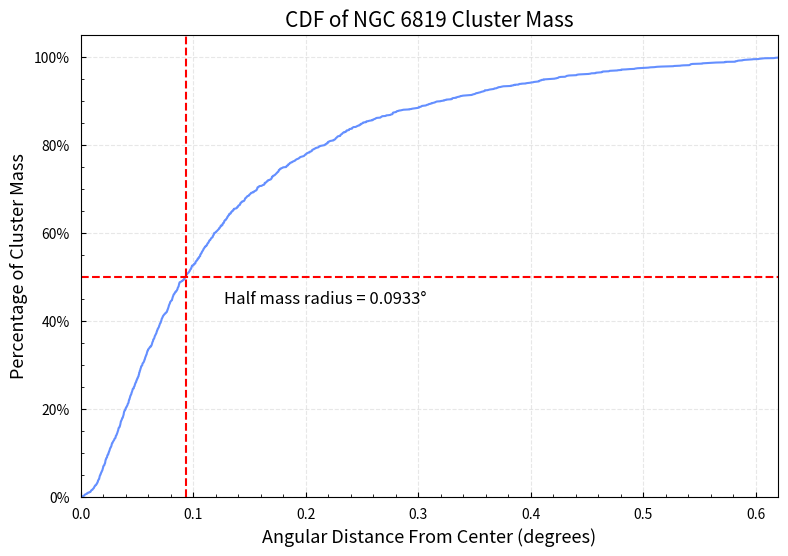

In [2780]:
# Create separate total mass columns for binary and single stars
binaryPhot_copy['total_mass'] = binaryPhot_copy['m1Median'] + binaryPhot_copy['m2Median']
singlePhot_copy['total_mass'] = singlePhot_copy['m1Median']

# Concatenate the dataframes
concatenatedGaiaData = pd.concat([binaryPhot_copy, singlePhot_copy])

#Sort the dataframe by distance
concatenatedGaiaData = concatenatedGaiaData.sort_values(by='distance')

# Compute the cumulative sum of the total_mass column
concatenatedGaiaData['cumulative_mass'] = concatenatedGaiaData['total_mass'].cumsum()

# Compute the total mass
total_mass = concatenatedGaiaData['total_mass'].sum()

# Compute the cumulative percentage of the total mass
concatenatedGaiaData['cumulative_percentage'] = concatenatedGaiaData['cumulative_mass'] / total_mass * 100

# Find the radius at which half of the total mass is reached
half_mass_radius = concatenatedGaiaData.loc[concatenatedGaiaData['cumulative_percentage'] >= 50, 'distance'].iloc[0]

# Plot the cumulative percentage as a function of radius
f,ax = plt.subplots(figsize=(9,6), facecolor='w')
plt.plot(concatenatedGaiaData['distance'], concatenatedGaiaData['cumulative_percentage'], color='#648fff')
plt.axvline(x=half_mass_radius, color='red', linestyle='--')
plt.axhline(y=50, color='red', linestyle='--')
plt.annotate(text=f'Half mass radius = {half_mass_radius:.4f}\u00b0', color='black', xy=(.127,44), xytext=(.127,44), size=12)
plt.xlabel("Angular Distance From Center (degrees)", fontsize=13)
plt.ylabel("Percentage of Cluster Mass", fontsize=13)
plt.title("CDF of NGC 6819 Cluster Mass", fontsize=15)
plt.grid(linestyle='--', alpha=0.3)
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.tick_params(which='both', direction="in")
ax.tick_params(axis='both', pad=8)
ax.set_xlim(0,.62)
ax.set_ylim(0,None)
print(total_mass, total_mass/2, half_mass_radius)
plt.show()


concatenatedGaiaData['total']

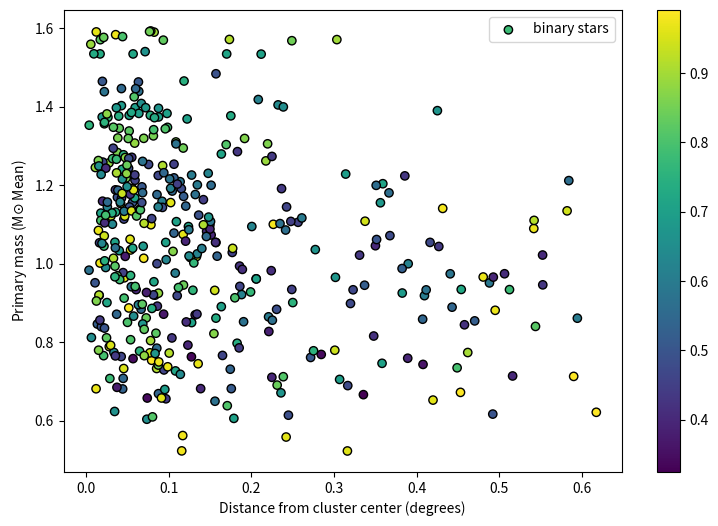

In [2781]:
f,ax = plt.subplots(figsize=(9,6))
r= binaryPhot_copy['qMedian']
#plt.scatter(singleGaiaData['distance'], singleGaiaData['m1Mean'], color='b', label="single stars")
plt.scatter(binaryPhot_copy['distance'], binaryPhot_copy['m1Median'], c=r, cmap=plt.cm.get_cmap("viridis"), edgecolor='black', label='binary stars')
plt.colorbar()
plt.xlabel("Distance from cluster center (degrees)")
plt.ylabel("Primary mass (M$\odot$ Mean)")
plt.legend()

In [2782]:
avg_spacing = (np.max(binaryPhot_copy['m1Median']) - np.min(binaryPhot_copy['m1Median']))/3
print(avg_spacing)
print(np.min(binaryPhot_copy['m1Median'])+(2*avg_spacing))

0.35655216666666667
1.2365193333333333


Min: 117251057.63021092 Max: 356866574.81261826
0.0005133145583780631
0.999999990510037
0.002819975687152129


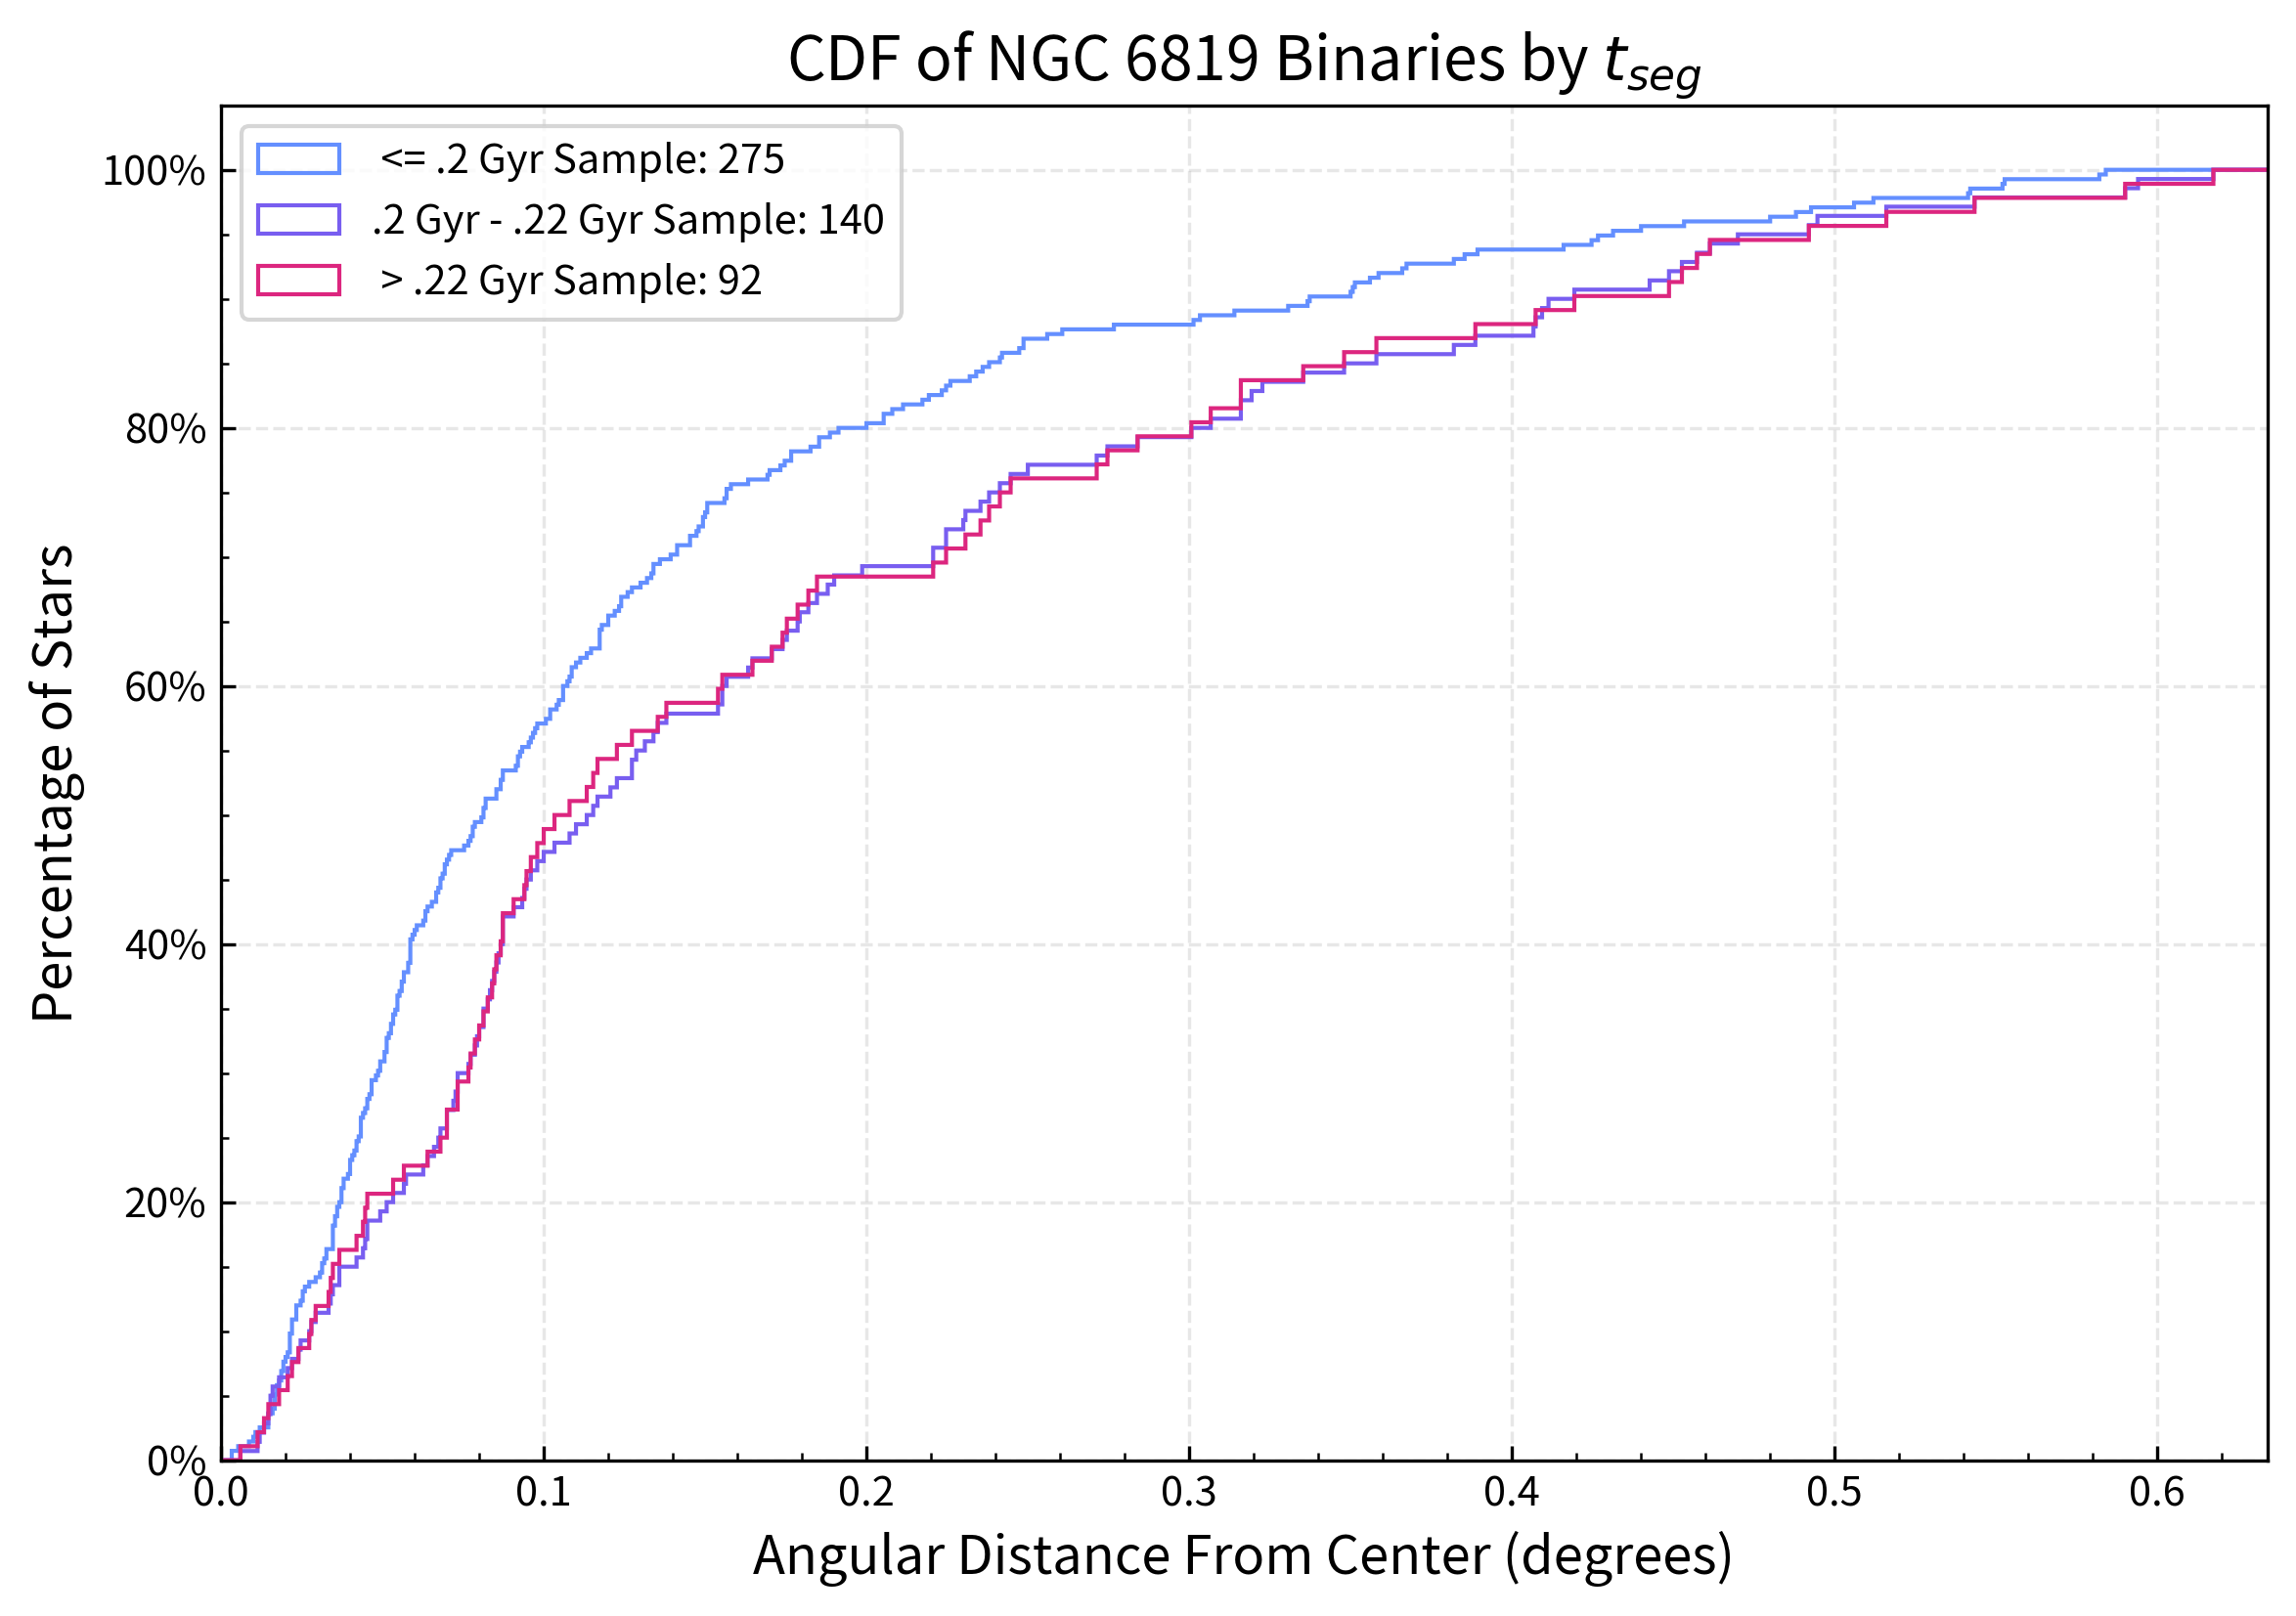

In [2833]:
#t_seg bins
f,ax = plt.subplots(figsize=(9,6), facecolor='w', dpi=300)

print("Min:", np.min(binaryPhot_copy['t_seg']), "Max:", np.max(binaryPhot_copy['t_seg']))
binaryfilter1 = binaryPhot_copy.loc[(binaryPhot_copy['t_seg']  >= np.min(binaryPhot_copy['t_seg'])) & (binaryPhot_copy['t_seg']  <= 200000000)]
binaryfilter2 = binaryPhot_copy.loc[(binaryPhot_copy['t_seg']  > 200000000) & (binaryPhot_copy['t_seg']  <=  2200000000)]
binaryfilter3 = binaryPhot_copy.loc[(binaryPhot_copy['t_seg']  > 220000000 ) & (binaryPhot_copy['t_seg']  <=  np.max(binaryPhot_copy['t_seg']))]

#print(binaryfilter1)
#binary = binaryGaiaData.loc[(binaryGaiaData['m1Mean']  > 1) & (binaryGaiaData['m1Mean']  <  1.3)]

bin1 = binaryfilter1['distance']
bin2 = binaryfilter2['distance']
bin3 = binaryfilter3['distance']
allbinaries = binaryPhot_copy['distance']

bin1Sample = bin1.shape[0]
bin2Sample = bin2.shape[0]
bin3Sample = bin3.shape[0]
allSample = binaryPhot_copy.shape[0]
# print(binary)

ax.hist(bin1, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 1500, color='#648fff', label=f' <= .2 Gyr Sample: {bin1Sample}')
ax.hist(bin2, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 1500, color='#785ef0', label=f'.2 Gyr - .22 Gyr Sample: {bin2Sample}')
ax.hist(bin3, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 1500, color='#dc267f', label=f' > .22 Gyr Sample: {bin3Sample}')
#ax.hist(allbinaries, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 1500, color='#FFB000', label=f'All Samples: {allSample}')


ks_result, twoside_pvalue1 = ks_2samp(bin1,bin2)
ks_result, less_pvalue1 = ks_2samp(bin1,bin2,alternative='less')
print(twoside_pvalue1)

ks_result, twoside_pvalue2 = ks_2samp(bin2,bin3)
ks_result, less_pvalue2= ks_2samp(bin2,bin3,alternative='less')
print(twoside_pvalue2)

ks_result, twoside_pvalue3= ks_2samp(bin1,bin3)
ks_result, less_pvalue3 = ks_2samp(bin1,bin3,alternative='less')
print(twoside_pvalue3)

plt.xlabel("Angular Distance From Center (degrees)", fontsize=13)
plt.ylabel("Percentage of Stars", fontsize=13)
plt.title("CDF of NGC 6819 Binaries by $t_{seg}$", fontsize=15)
plt.legend(loc='upper left')
# plt.text(.008, .88, f'K-S "two-sided" P-value: {twoside_pvalue:.5f}\nK-S "less" P-value: {less_pvalue:.5f}\n1.0M$\odot$ - 1.3M$\odot$ Sample: {binarySample}\n0.6M$\odot$ - 1.0M$\odot$ Sample: {singleSample}',fontsize = 10, 
#          bbox = dict(facecolor='w', boxstyle='round', edgecolor='lightgray'))
# custom_lines = [ Line2D([0], [0], color='g',alpha=1, lw=2, ls='-'),
#                                 Line2D([0], [0], color='b',alpha=1, lw=2, ls='-'), ]
plt.grid(linestyle='--', alpha=0.3)
#plt.legend(custom_lines, ['Binary stars', 'Single stars'],loc=2, fontsize=10)
# plt.annotate(text="Binary stars", color='g', xy=(.104,.81), xytext=(.104,.81), size=12)
# plt.annotate(text="Single stars", color='b', xy=(.155,.69), xytext=(.155,.69), size=12)
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.tick_params(which='both', direction="in")
ax.set_xlim(0,.634)
plt.show()

Min: 116894007.59137738 Max: 324155604.0312591
0.0015030081097012905
6.505026149411382e-05
7.906197261379018e-14


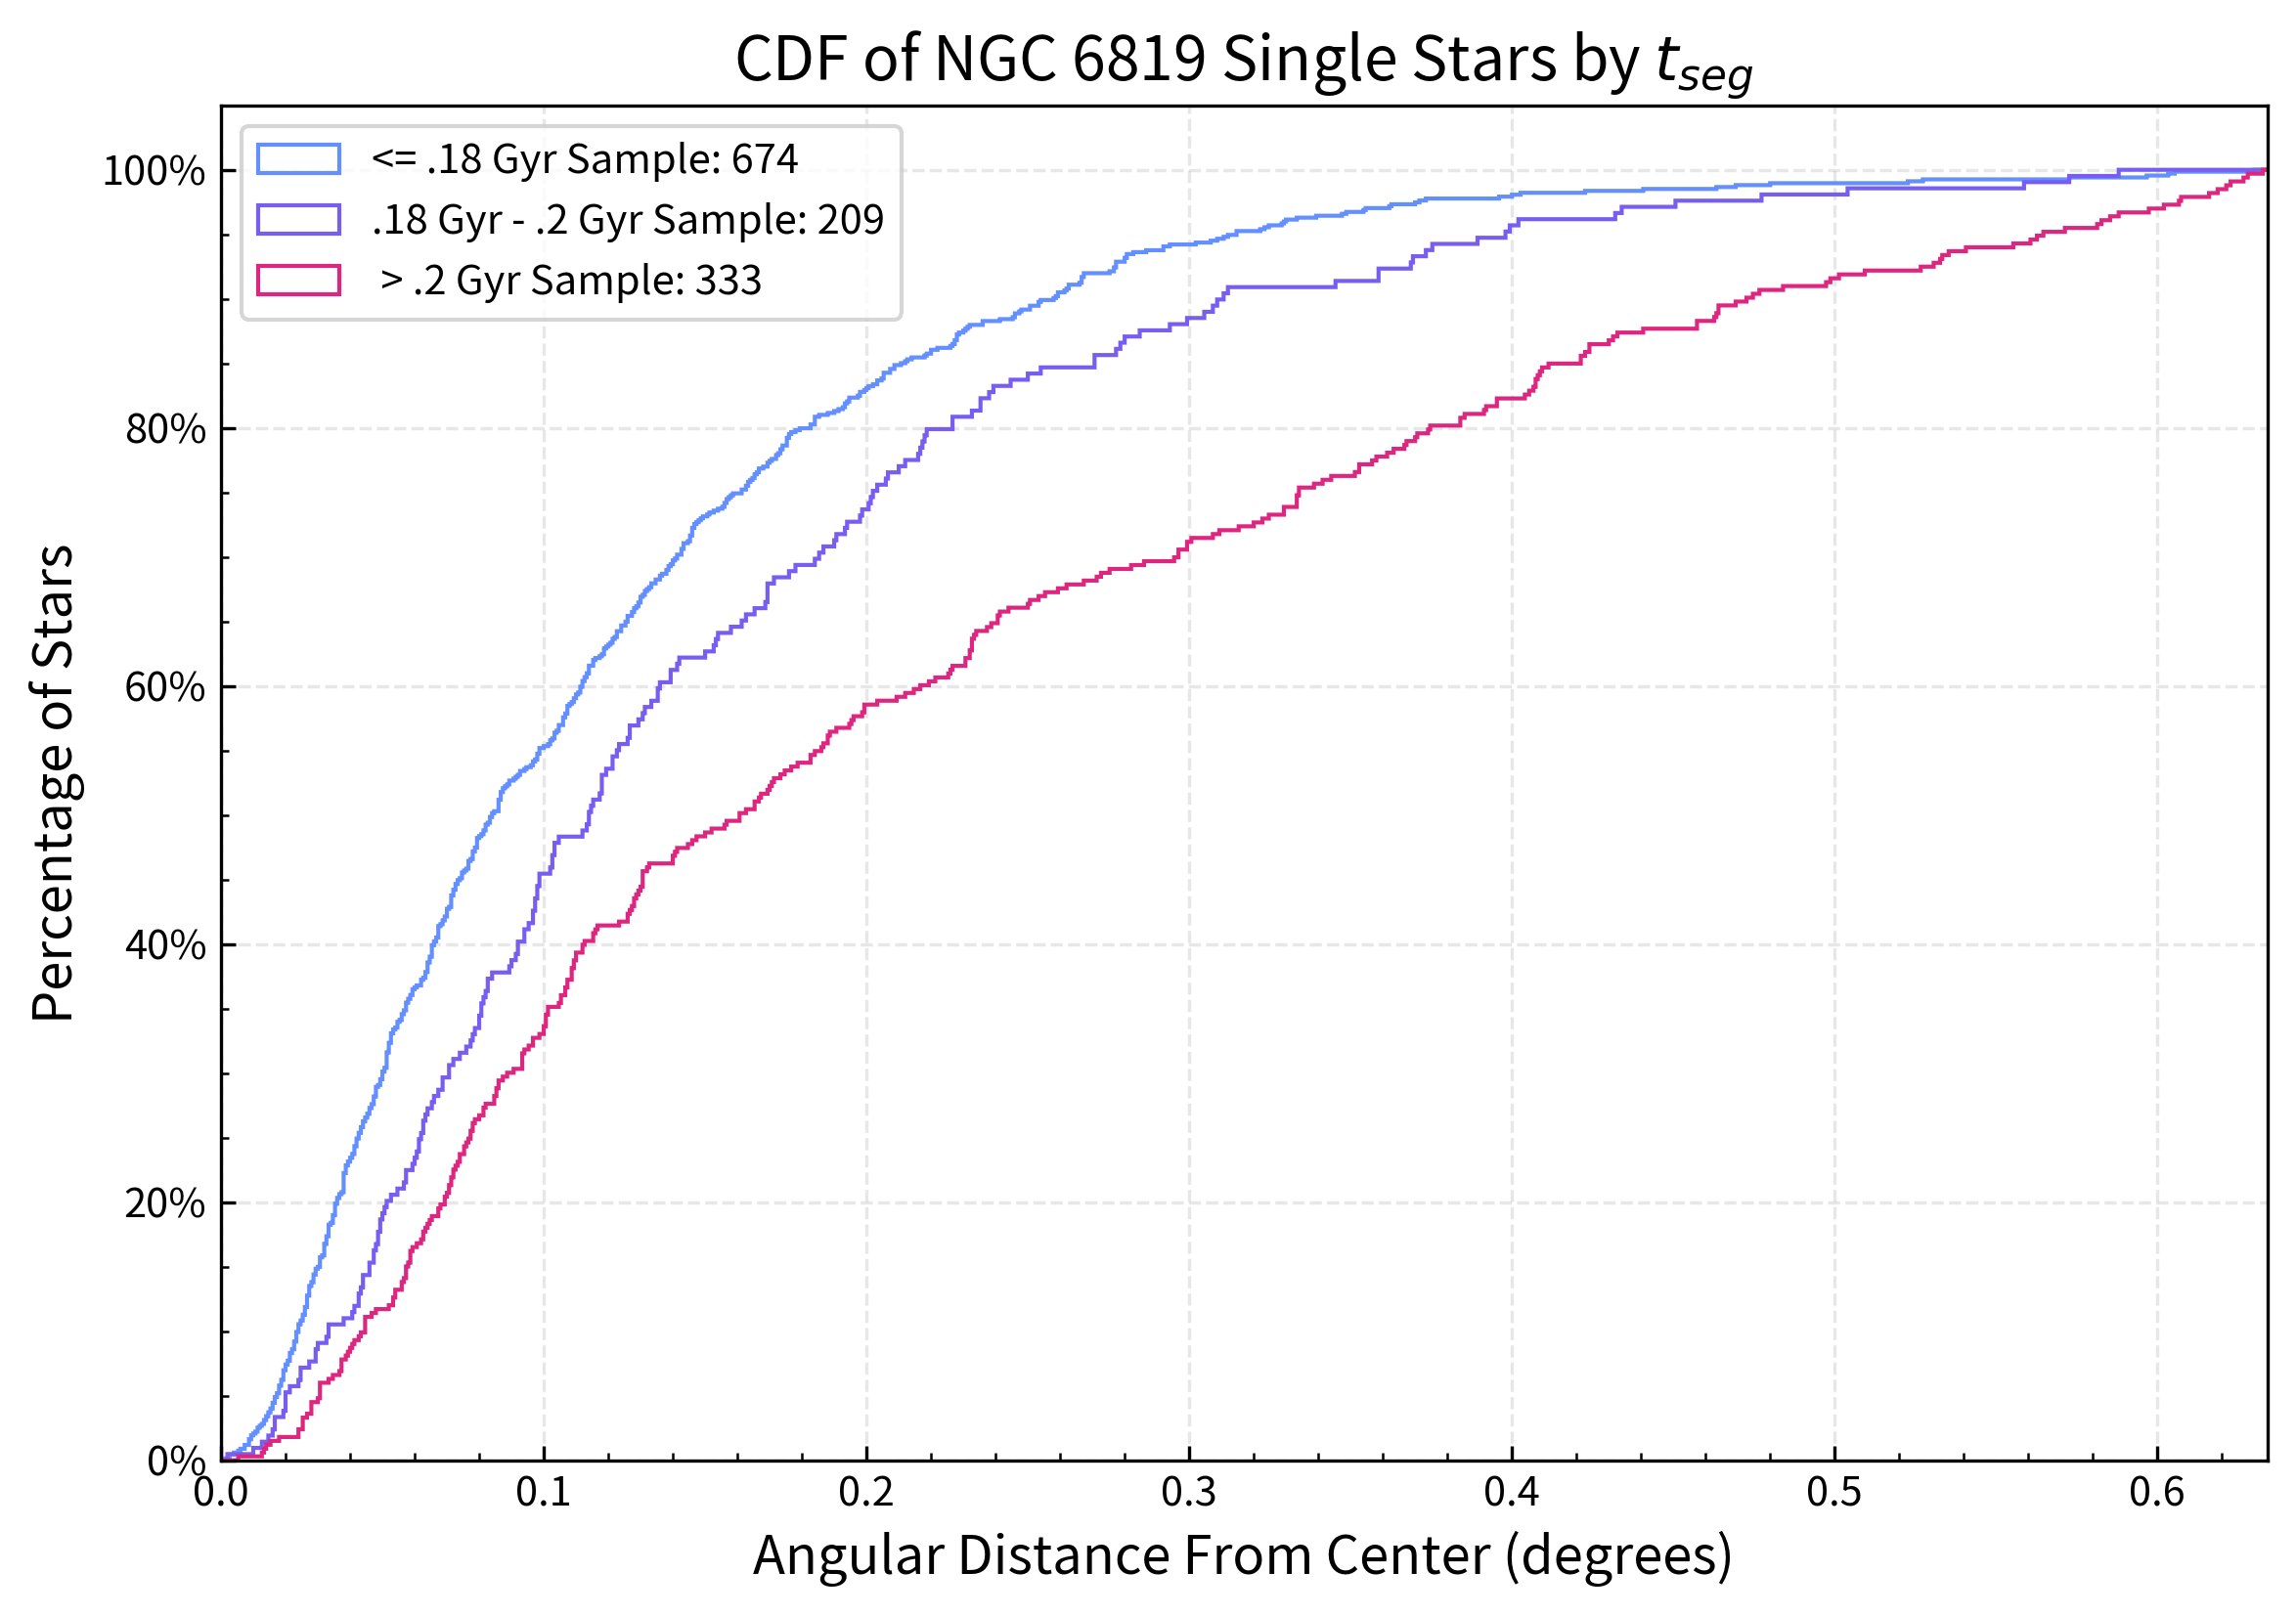

In [2836]:
#t_seg bins for SINGLE stars
f,ax = plt.subplots(figsize=(9,6), facecolor='w', dpi=300)

print("Min:", np.min(singlePhot_copy['t_seg']), "Max:", np.max(singlePhot_copy['t_seg']))
singlefilter1 = singlePhot_copy.loc[(singlePhot_copy['t_seg']  >= np.min(singlePhot_copy['t_seg'])) & (singlePhot_copy['t_seg']  <= 180000000)]
singlefilter2 = singlePhot_copy.loc[(singlePhot_copy['t_seg']  > 180000000) & (singlePhot_copy['t_seg']  <=  200000000)]
singlefilter3 = singlePhot_copy.loc[(singlePhot_copy['t_seg']  > 200000000 ) & (singlePhot_copy['t_seg']  <=  np.max(singlePhot_copy['t_seg']))]

#print(binaryfilter1)
#binary = binaryGaiaData.loc[(binaryGaiaData['m1Mean']  > 1) & (binaryGaiaData['m1Mean']  <  1.3)]

bin1 = singlefilter1['distance']
bin2 = singlefilter2['distance']
bin3 = singlefilter3['distance']
allsingle = singlePhot_copy['distance']

bin1Sample = bin1.shape[0]
bin2Sample = bin2.shape[0]
bin3Sample = bin3.shape[0]
allSample = singlePhot_copy.shape[0]
# print(binary)

ax.hist(bin1, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 1500, color='#648fff', label=f'<= .18 Gyr Sample: {bin1Sample}')
ax.hist(bin2, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 1500, color='#785ef0', label=f'.18 Gyr - .2 Gyr Sample: {bin2Sample}')
ax.hist(bin3, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 1500, color='#dc267f', label=f' > .2 Gyr Sample: {bin3Sample}')
#ax.hist(allsingle, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 1500, color='#FFB000', label=f'All Samples: {allSample}')


ks_result, twoside_pvalue1 = ks_2samp(bin1,bin2)
ks_result, less_pvalue1 = ks_2samp(bin1,bin2,alternative='less')
print(twoside_pvalue1)

ks_result, twoside_pvalue2 = ks_2samp(bin2,bin3)
ks_result, less_pvalue2= ks_2samp(bin2,bin3,alternative='less')
print(twoside_pvalue2)

ks_result, twoside_pvalue3= ks_2samp(bin1,bin3)
ks_result, less_pvalue3 = ks_2samp(bin1,bin3,alternative='less')
print(twoside_pvalue3)

plt.xlabel("Angular Distance From Center (degrees)", fontsize=13)
plt.ylabel("Percentage of Stars", fontsize=13)
plt.title("CDF of NGC 6819 Single Stars by $t_{seg}$", fontsize=15)
plt.legend(loc='upper left')
# plt.text(.008, .88, f'K-S "two-sided" P-value: {twoside_pvalue:.5f}\nK-S "less" P-value: {less_pvalue:.5f}\n1.0M$\odot$ - 1.3M$\odot$ Sample: {binarySample}\n0.6M$\odot$ - 1.0M$\odot$ Sample: {singleSample}',fontsize = 10, 
#          bbox = dict(facecolor='w', boxstyle='round', edgecolor='lightgray'))
# custom_lines = [ Line2D([0], [0], color='g',alpha=1, lw=2, ls='-'),
#                                 Line2D([0], [0], color='b',alpha=1, lw=2, ls='-'), ]
plt.grid(linestyle='--', alpha=0.3)
#plt.legend(custom_lines, ['Binary stars', 'Single stars'],loc=2, fontsize=10)
# plt.annotate(text="Binary stars", color='g', xy=(.104,.81), xytext=(.104,.81), size=12)
# plt.annotate(text="Single stars", color='b', xy=(.155,.69), xytext=(.155,.69), size=12)
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.tick_params(which='both', direction="in")
ax.set_xlim(0,.634)
plt.show()

In [2785]:
# #mass ranges CDF
# f,ax = plt.subplots(figsize=(9,6), facecolor='w', dpi=300)

# binaryfilter1 = binaryPhot_copy.loc[(binaryPhot_copy['m1Median']  >= np.min(binaryPhot_copy['m1Median'])) & (binaryPhot_copy['m1Median']  <= .8)]
# binaryfilter2 = binaryPhot_copy.loc[(binaryPhot_copy['m1Median']  > .8) & (binaryPhot_copy['m1Median']  <=  1)]
# binaryfilter3 = binaryPhot_copy.loc[(binaryPhot_copy['m1Median']  > 1 ) & (binaryPhot_copy['m1Median']  <=  np.max(binaryPhot_copy['m1Median']))]
# print("Min:", np.min(binaryPhot_copy['m1Median']), "Max:", np.max(binaryPhot_copy['m1Median']))
# #print(binaryfilter1)
# #binary = binaryGaiaData.loc[(binaryGaiaData['m1Mean']  > 1) & (binaryGaiaData['m1Mean']  <  1.3)]

# bin1 = binaryfilter1['distance']
# bin2 = binaryfilter2['distance']
# bin3 = binaryfilter3['distance']
# allbinaries = binaryPhot_copy['distance']

# bin1Sample = bin1.shape[0]
# bin2Sample = bin2.shape[0]
# bin3Sample = bin3.shape[0]
# allSample = binaryPhot_copy.shape[0]
# # print(binary)

# ax.hist(bin1, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 1500, color='#648fff', label=f'0.51M$\odot$ - 0.8M$\odot$ Sample: {bin1Sample}')
# ax.hist(bin2, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 1500,color='#785ef0', label=f'0.8M$\odot$ - 1M$\odot$ Sample: {bin2Sample}')
# ax.hist(bin3, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 1500,color='#dc267f', label=f'1M$\odot$ - 1.6M$\odot$ Sample: {bin3Sample}')
# #ax.hist(allbinaries, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 1500,color='#FFB000', label=f'All Samples: {allSample}')


# ks_result, twoside_pvalue1 = ks_2samp(bin1,bin2)
# ks_result, less_pvalue1 = ks_2samp(bin1,bin2,alternative='less')
# print(twoside_pvalue1)

# ks_result, twoside_pvalue2 = ks_2samp(bin2,bin3)
# ks_result, less_pvalue2= ks_2samp(bin2,bin3,alternative='less')
# print(twoside_pvalue2)

# ks_result, twoside_pvalue3= ks_2samp(bin1,bin3)
# ks_result, less_pvalue3 = ks_2samp(bin1,bin3,alternative='less')
# print(twoside_pvalue3 )

# plt.xlabel("Angular Distance From Center (degrees)", fontsize=13)
# plt.ylabel("Percentage of Stars", fontsize=13)
# plt.title("CDF of NGC 6819 Binaries by Mass", fontsize=15)
# plt.legend(loc='upper left')
# # plt.text(.008, .88, f'K-S "two-sided" P-value: {twoside_pvalue:.5f}\nK-S "less" P-value: {less_pvalue:.5f}\n1.0M$\odot$ - 1.3M$\odot$ Sample: {binarySample}\n0.6M$\odot$ - 1.0M$\odot$ Sample: {singleSample}',fontsize = 10, 
# #          bbox = dict(facecolor='w', boxstyle='round', edgecolor='lightgray'))
# # custom_lines = [ Line2D([0], [0], color='g',alpha=1, lw=2, ls='-'),
# #                                 Line2D([0], [0], color='b',alpha=1, lw=2, ls='-'), ]
# plt.grid(linestyle='--', alpha=0.3)
# #plt.legend(custom_lines, ['Binary stars', 'Single stars'],loc=2, fontsize=10)
# # plt.annotate(text="Binary stars", color='g', xy=(.104,.81), xytext=(.104,.81), size=12)
# # plt.annotate(text="Single stars", color='b', xy=(.155,.69), xytext=(.155,.69), size=12)
# from matplotlib.ticker import PercentFormatter
# plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# ax.yaxis.get_ticklocs(minor=True)
# ax.minorticks_on()
# ax.tick_params(which='both', direction="in")
# ax.set_xlim(0,.634)
# plt.show()

In [2786]:
# #mass ranges CDF for SINGLE stars
# f,ax = plt.subplots(figsize=(9,6), facecolor='w', dpi=300)

# print("Min:", np.min(singlePhot_copy['m1Median']), "Max:", np.max(singlePhot_copy['m1Median']))
# singlefilter1 = singlePhot_copy.loc[(singlePhot_copy['m1Median']  >= np.min(singlePhot_copy['m1Median'])) & (singlePhot_copy['m1Median']  <= .8)]
# singlefilter2 = singlePhot_copy.loc[(singlePhot_copy['m1Median']  > .8) & (singlePhot_copy['m1Median']  <=  1)]
# singlefilter3 = singlePhot_copy.loc[(singlePhot_copy['m1Median']  > 1 ) & (singlePhot_copy['m1Median']  <=  np.max(singlePhot_copy['m1Median']))]

# #print(binaryfilter1)
# #binary = binaryGaiaData.loc[(binaryGaiaData['m1Mean']  > 1) & (binaryGaiaData['m1Mean']  <  1.3)]

# bin1 = singlefilter1['distance']
# bin2 = singlefilter2['distance']
# bin3 = singlefilter3['distance']
# allsingle = singlePhot_copy['distance']

# bin1Sample = bin1.shape[0]
# bin2Sample = bin2.shape[0]
# bin3Sample = bin3.shape[0]
# allSample = singlePhot_copy.shape[0]
# # print(binary)

# ax.hist(bin1, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 1500, color='#648fff', label=f'0.56M$\odot$ - 0.8M$\odot$ Sample: {bin1Sample}')
# ax.hist(bin2, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 1500,color='#785ef0', label=f'0.8M$\odot$ - 1M$\odot$ Sample: {bin2Sample}')
# ax.hist(bin3, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 1500,color='#dc267f', label=f'1M$\odot$ - 1.6M$\odot$ Sample: {bin3Sample}')
# ax.hist(allsingle, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 1500,color='#FFB000', label=f'All Samples: {allSample}')


# ks_result, twoside_pvalue1 = ks_2samp(bin1,bin2)
# ks_result, less_pvalue1 = ks_2samp(bin1,bin2,alternative='less')
# print(twoside_pvalue1)

# ks_result, twoside_pvalue2 = ks_2samp(bin2,bin3)
# ks_result, less_pvalue2= ks_2samp(bin2,bin3,alternative='less')
# print(twoside_pvalue2)

# ks_result, twoside_pvalue3= ks_2samp(bin1,bin3)
# ks_result, less_pvalue3 = ks_2samp(bin1,bin3,alternative='less')
# print(twoside_pvalue3 )

# plt.xlabel("Angular Distance From Center (degrees)", fontsize=13)
# plt.ylabel("Percentage of Stars", fontsize=13)
# plt.title("CDF of NGC 6819 Single Stars by Mass", fontsize=15)
# plt.legend(loc='upper left')
# # plt.text(.008, .88, f'K-S "two-sided" P-value: {twoside_pvalue:.5f}\nK-S "less" P-value: {less_pvalue:.5f}\n1.0M$\odot$ - 1.3M$\odot$ Sample: {binarySample}\n0.6M$\odot$ - 1.0M$\odot$ Sample: {singleSample}',fontsize = 10, 
# #          bbox = dict(facecolor='w', boxstyle='round', edgecolor='lightgray'))
# # custom_lines = [ Line2D([0], [0], color='g',alpha=1, lw=2, ls='-'),
# #                                 Line2D([0], [0], color='b',alpha=1, lw=2, ls='-'), ]
# plt.grid(linestyle='--', alpha=0.3)
# #plt.legend(custom_lines, ['Binary stars', 'Single stars'],loc=2, fontsize=10)
# # plt.annotate(text="Binary stars", color='g', xy=(.104,.81), xytext=(.104,.81), size=12)
# # plt.annotate(text="Single stars", color='b', xy=(.155,.69), xytext=(.155,.69), size=12)
# from matplotlib.ticker import PercentFormatter
# plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# ax.yaxis.get_ticklocs(minor=True)
# ax.minorticks_on()
# ax.tick_params(which='both', direction="in")
# ax.set_xlim(0,.634)
# plt.show()

In [2787]:
# #G magnitude ranges CDF
# f,ax = plt.subplots(figsize=(9,6), facecolor='w', dpi=300)

# #filters from lowest mag to highest mag
# binaryfilter1 = binaryPhot_copy.loc[(binaryPhot_copy['G']  >= 18.1) & (binaryPhot_copy['G']  <= 21)]
# binaryfilter2 = binaryPhot_copy.loc[(binaryPhot_copy['G']  > 16.8) & (binaryPhot_copy['G']  <=  18.1)]
# binaryfilter3 = binaryPhot_copy.loc[(binaryPhot_copy['G']  > 15.8 ) & (binaryPhot_copy['G']  <=  16.8)]
# binaryfilterAll = binaryPhot_copy.loc[(binaryPhot_copy['G']  <= 21) & (binaryPhot_copy['G']  > 15.8 )]
# #print(binaryfilter1)
# #binary = binaryGaiaData.loc[(binaryGaiaData['m1Mean']  > 1) & (binaryGaiaData['m1Mean']  <  1.3)]

# bin1 = binaryfilter1['distance']
# bin2 = binaryfilter2['distance']
# bin3 = binaryfilter3['distance']
# allbinaries = binaryfilterAll['distance']
# #print(binaryfilter1)

# bin1Sample = bin1.shape[0]
# bin2Sample = bin2.shape[0]
# bin3Sample = bin3.shape[0]
# allSample = bin1Sample + bin2Sample + bin3Sample
# # print(binary)

# ax.hist(bin1, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 1500, color='#e4def5', label=f'G > 18.1 mag & G < 21 mag Sample: {bin1Sample}')
# ax.hist(bin2, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 1500, color='#8A8DC0', label=f'G > 16.8 mag & G < 18.1 mag Sample: {bin2Sample}')
# ax.hist(bin3, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 1500, color='#5D51A3', label=f'G > 15.8 mag & G < 16.8 mag Sample: {bin3Sample}')
# ax.hist(allbinaries, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 1500,color='r', label=f'All Samples: {allSample}')


# ks_result, twoside_pvalue1 = ks_2samp(bin1,bin2)
# ks_result, less_pvalue1 = ks_2samp(bin1,bin2,alternative='less')
# print(twoside_pvalue1)

# ks_result, twoside_pvalue2 = ks_2samp(bin2,bin3)
# ks_result, less_pvalue2= ks_2samp(bin2,bin3,alternative='less')
# print(twoside_pvalue2)

# ks_result, twoside_pvalue3= ks_2samp(bin1,bin3)
# ks_result, less_pvalue3 = ks_2samp(bin1,bin3,alternative='less')
# print(twoside_pvalue3 )

# plt.xlabel("Angular Distance From Center (degrees)", fontsize=13)
# plt.ylabel("Percentage of Stars", fontsize=13)
# plt.title("CDF of NGC 6819 Binaries by G", fontsize=15)
# plt.legend(loc='upper left')
# # plt.text(.008, .88, f'K-S "two-sided" P-value: {twoside_pvalue:.5f}\nK-S "less" P-value: {less_pvalue:.5f}\n1.0M$\odot$ - 1.3M$\odot$ Sample: {binarySample}\n0.6M$\odot$ - 1.0M$\odot$ Sample: {singleSample}',fontsize = 10, 
# #          bbox = dict(facecolor='w', boxstyle='round', edgecolor='lightgray'))
# # custom_lines = [ Line2D([0], [0], color='g',alpha=1, lw=2, ls='-'),
# #                                 Line2D([0], [0], color='b',alpha=1, lw=2, ls='-'), ]
# plt.grid(linestyle='--', alpha=0.3)
# #plt.legend(custom_lines, ['Binary stars', 'Single stars'],loc=2, fontsize=10)
# # plt.annotate(text="Binary stars", color='g', xy=(.104,.81), xytext=(.104,.81), size=12)
# # plt.annotate(text="Single stars", color='b', xy=(.155,.69), xytext=(.155,.69), size=12)
# from matplotlib.ticker import PercentFormatter
# plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# ax.yaxis.get_ticklocs(minor=True)
# ax.minorticks_on()
# ax.tick_params(which='both', direction="in")
# ax.set_xlim(0,.614)
# plt.show()

0.09383384335029848


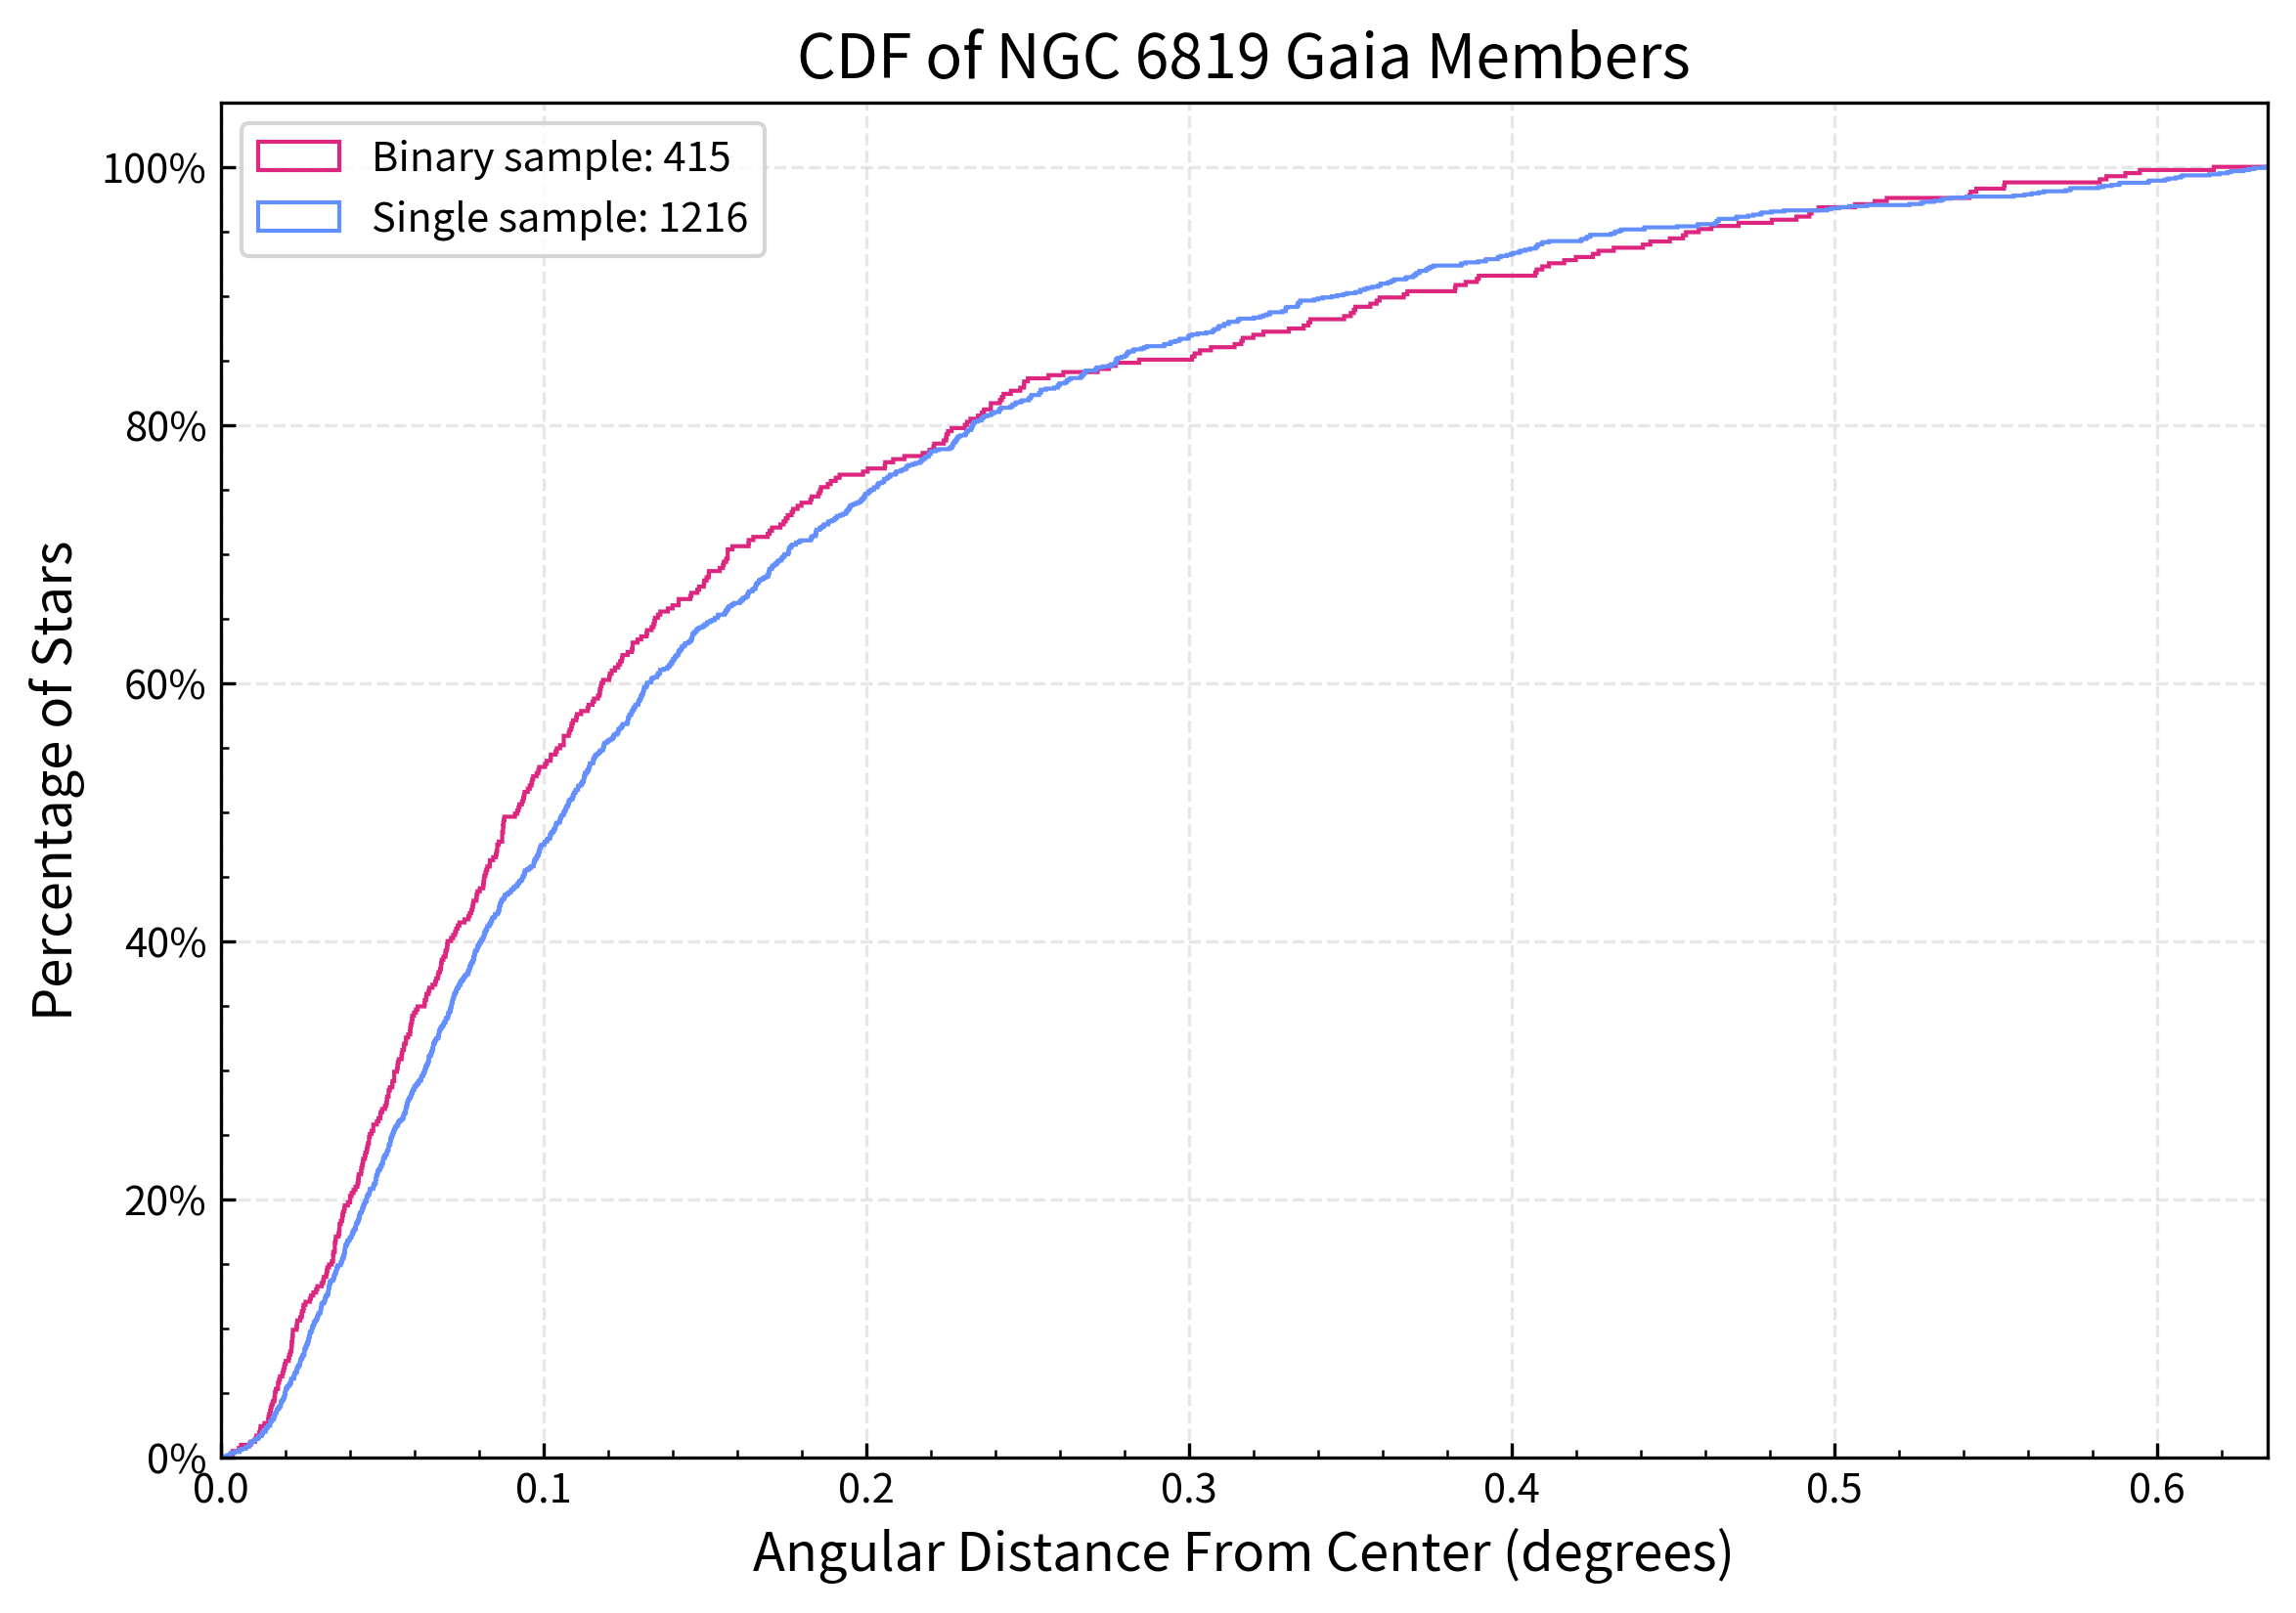

In [2788]:
#full sample CDF
f,ax = plt.subplots(figsize=(9,6), facecolor='w', dpi=300)

single = singlePhot_copy['distance']
binary = binaryPhot_copy['distance']

singleSample = single.shape[0]
binarySample = binary.shape[0]

ax.hist(binary, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 15000,color='#dc267f', label=f'Binary sample: {binarySample}')
ax.hist(single, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 15000, color='#648fff', label=f'Single sample: {singleSample}')


ks_result, twoside_pvalue = ks_2samp(single,binary)
ks_result, less_pvalue = ks_2samp(single,binary,alternative='less')
print(twoside_pvalue)

plt.xlabel("Angular Distance From Center (degrees)", fontsize=13)
plt.ylabel("Percentage of Stars", fontsize=13)
plt.title("CDF of NGC 6819 Gaia Members", fontsize=15)
plt.legend(loc='upper left')
# plt.text(.008, .88, f'K-S "two-sided" P-value: {twoside_pvalue:.5f}\nK-S "less" P-value: {less_pvalue:.5f}\nBinary sample: {binarySample}\nSingle sample: {singleSample}',fontsize = 10, 
#          bbox = dict(facecolor='w', boxstyle='round', edgecolor='lightgray'))
# custom_lines = [ Line2D([0], [0], color='g',alpha=1, lw=2, ls='-'),
#                                 Line2D([0], [0], color='b',alpha=1, lw=2, ls='-'), ]
plt.grid(linestyle='--', alpha=0.3)
#plt.legend(custom_lines, ['Binary stars', 'Single stars'],loc=2, fontsize=10)
# plt.annotate(text="Binary stars", color='g', xy=(.104,.81), xytext=(.104,.81), size=12)
# plt.annotate(text="Single stars", color='b', xy=(.155,.69), xytext=(.155,.69), size=12)
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.tick_params(which='both', direction="in")
ax.set_xlim(0,.634)
plt.show()

/Users/Claire/opt/anaconda3/envs/BASE9/lib/python3.10/site-packages/scipy/stats/_stats_py.py:7613: RuntimeWarning: overflow encountered in double_scalars
  num_paths += term


0.11904256902009978 0.05941884556803469


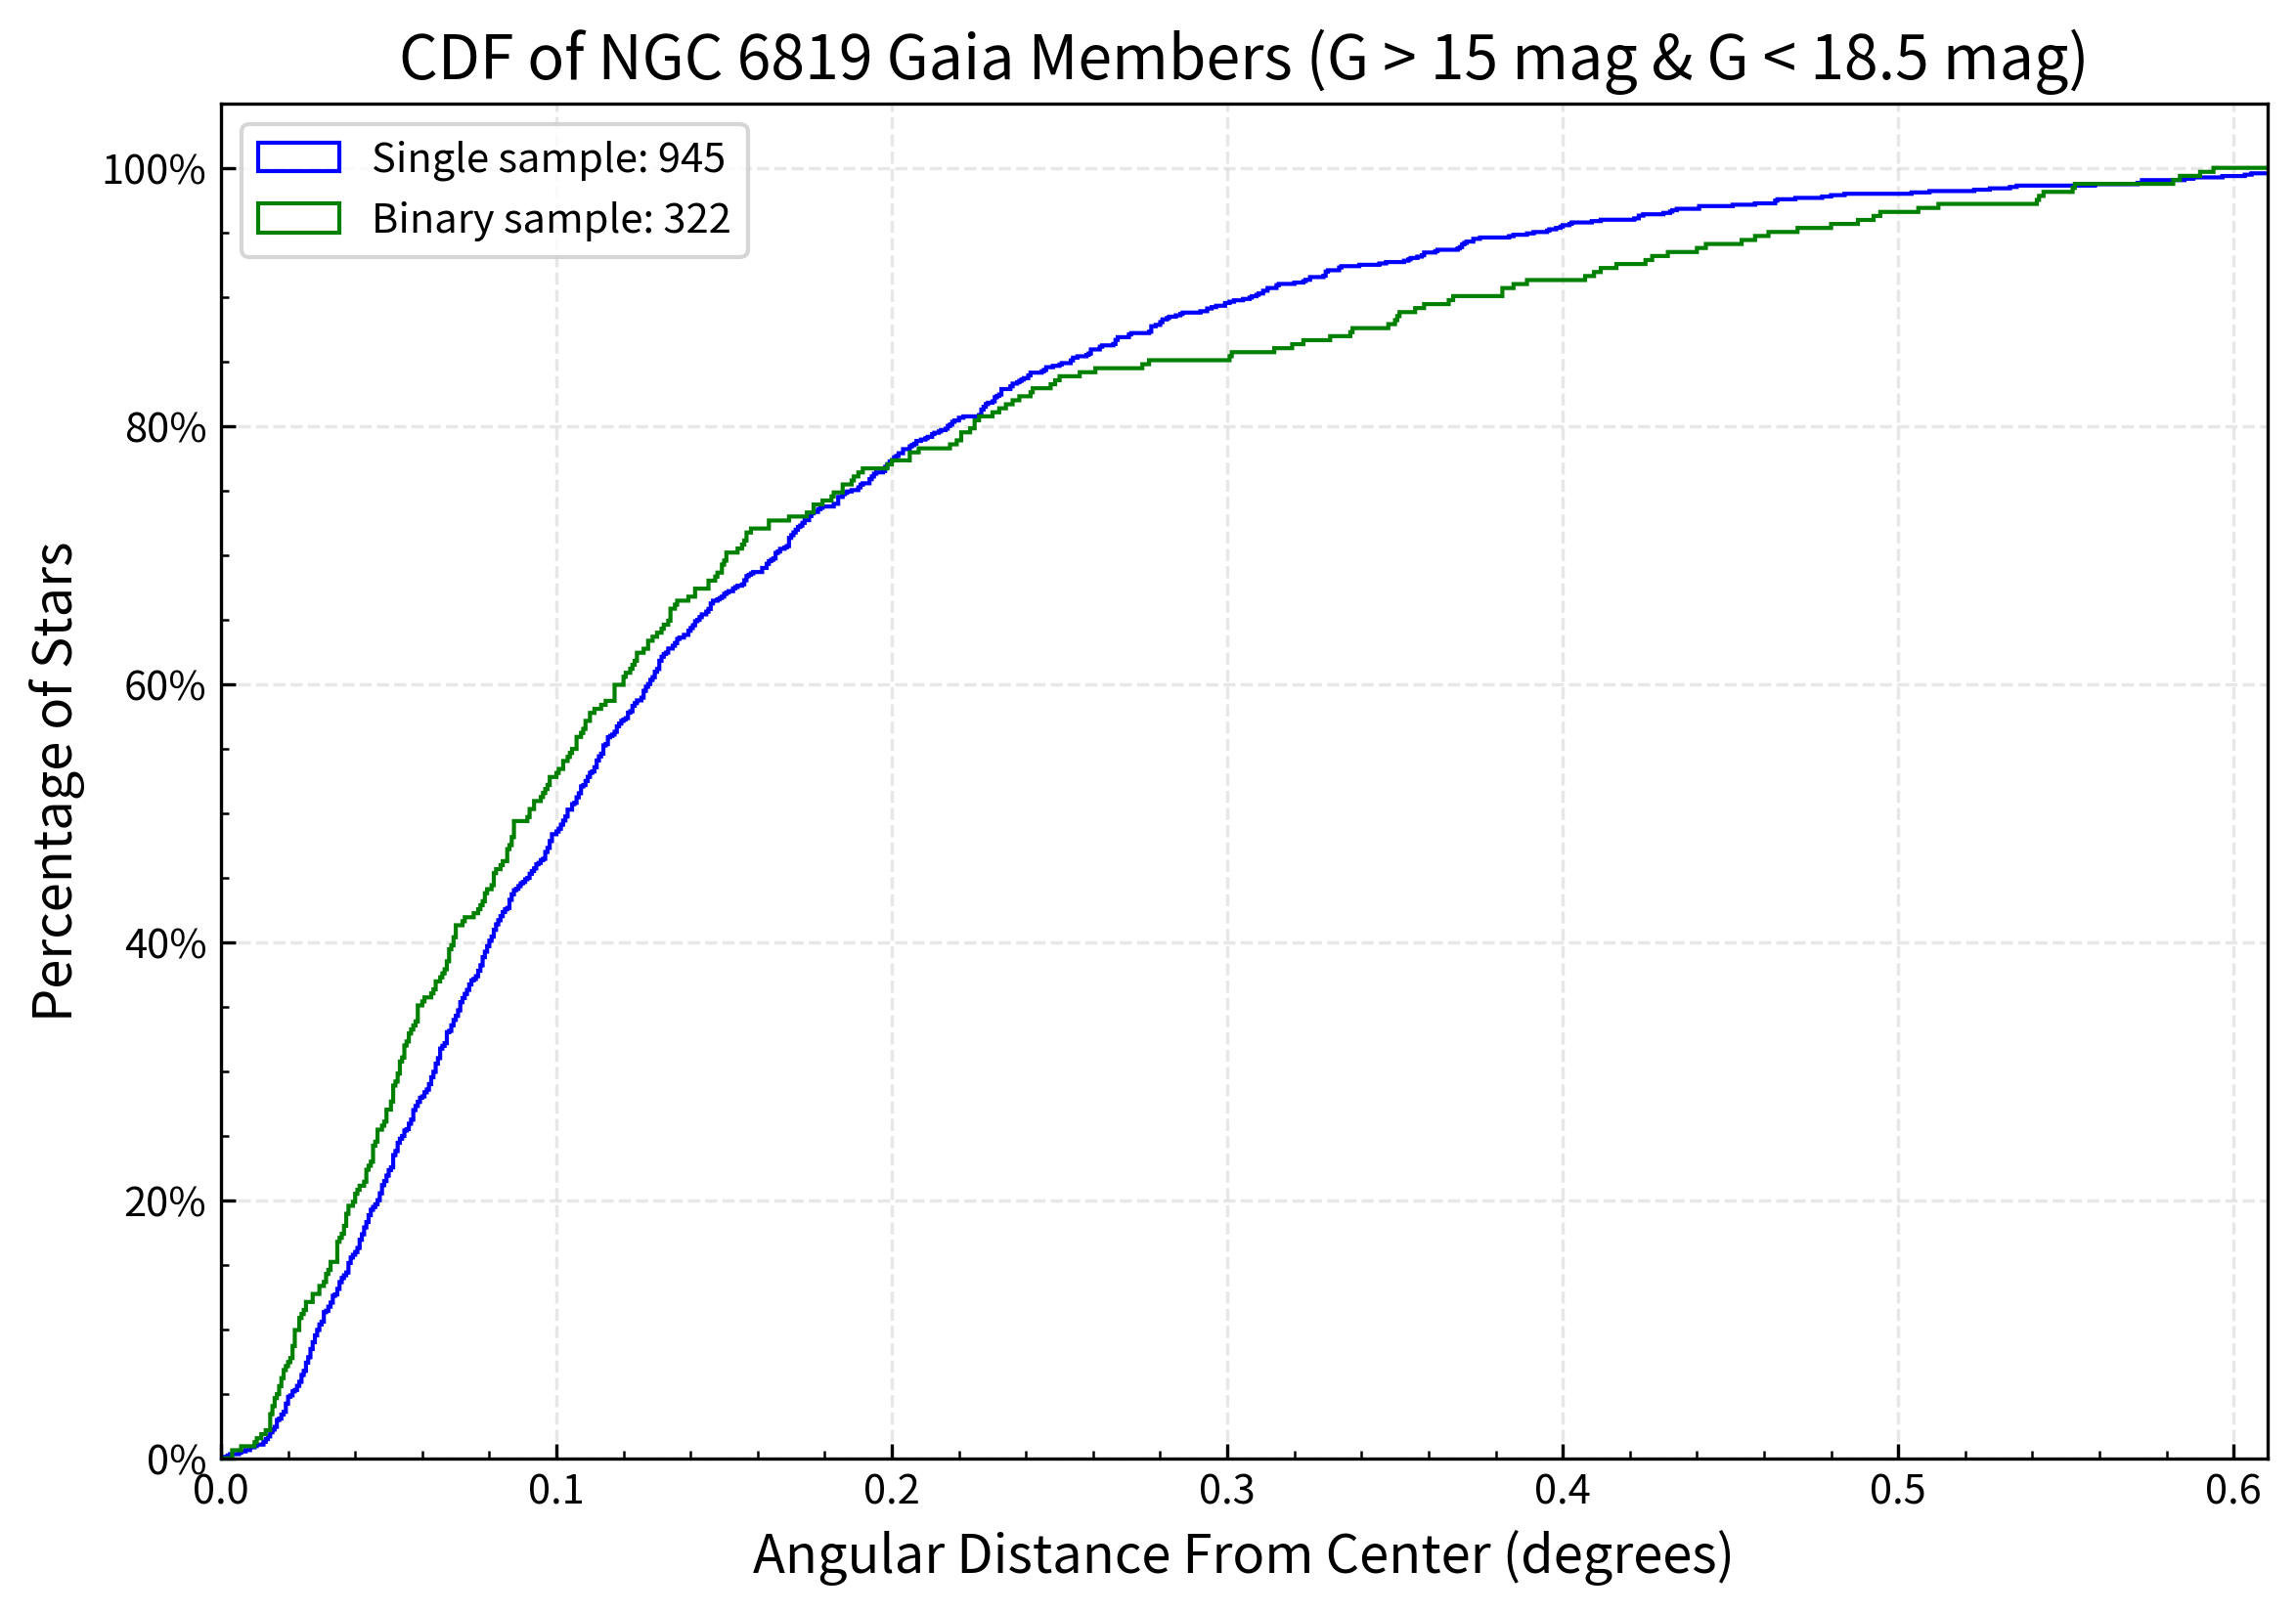

In [2789]:
#topmag and bottommag CDF
f,ax = plt.subplots(figsize=(9,6), facecolor='w', dpi=300)

single = cutSinglePhot['distance']
binary = cutBinaryPhot['distance']

singleSample = single.shape[0]
binarySample = binary.shape[0]

ax.hist(single, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 1500, color='b', label=f'Single sample: {singleSample}')
ax.hist(binary, cumulative = True, density = True, range=(0,1), histtype = "step", bins = 1500,color='g', label=f'Binary sample: {binarySample}')

ks_result, twoside_pvalue = ks_2samp(single,binary)
ks_result, less_pvalue = ks_2samp(single,binary,alternative='less')
print(twoside_pvalue, less_pvalue)

plt.xlabel("Angular Distance From Center (degrees)", fontsize=13)
plt.ylabel("Percentage of Stars", fontsize=13)
plt.title("CDF of NGC 6819 Gaia Members (G > 15 mag & G < 18.5 mag)", fontsize=15)
plt.legend(loc='upper left')
# plt.text(.008, .88, f'K-S "two-sided" P-value: {twoside_pvalue:.5f}\nK-S "less" P-value: {less_pvalue:.5f}\nBinary sample: {binarySample}\nSingle sample: {singleSample}',fontsize = 10, 
#          bbox = dict(facecolor='w', boxstyle='round', edgecolor='lightgray'))
# custom_lines = [ Line2D([0], [0], color='g',alpha=1, lw=2, ls='-'),
#                                 Line2D([0], [0], color='b',alpha=1, lw=2, ls='-')]
plt.grid(linestyle='--', alpha=0.3)
#plt.legend(custom_lines, ['Binary stars', 'Single stars'],loc=2, fontsize=10)
# plt.annotate(text="Binary stars", color='g', xy=(.104,.81), xytext=(.104,.81), size=12)
# plt.annotate(text="Single stars", color='b', xy=(.155,.69), xytext=(.155,.69), size=12)
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.tick_params(which='both', direction="in")
ax.set_xlim(0,.61)
plt.show()

0.004105248004965826


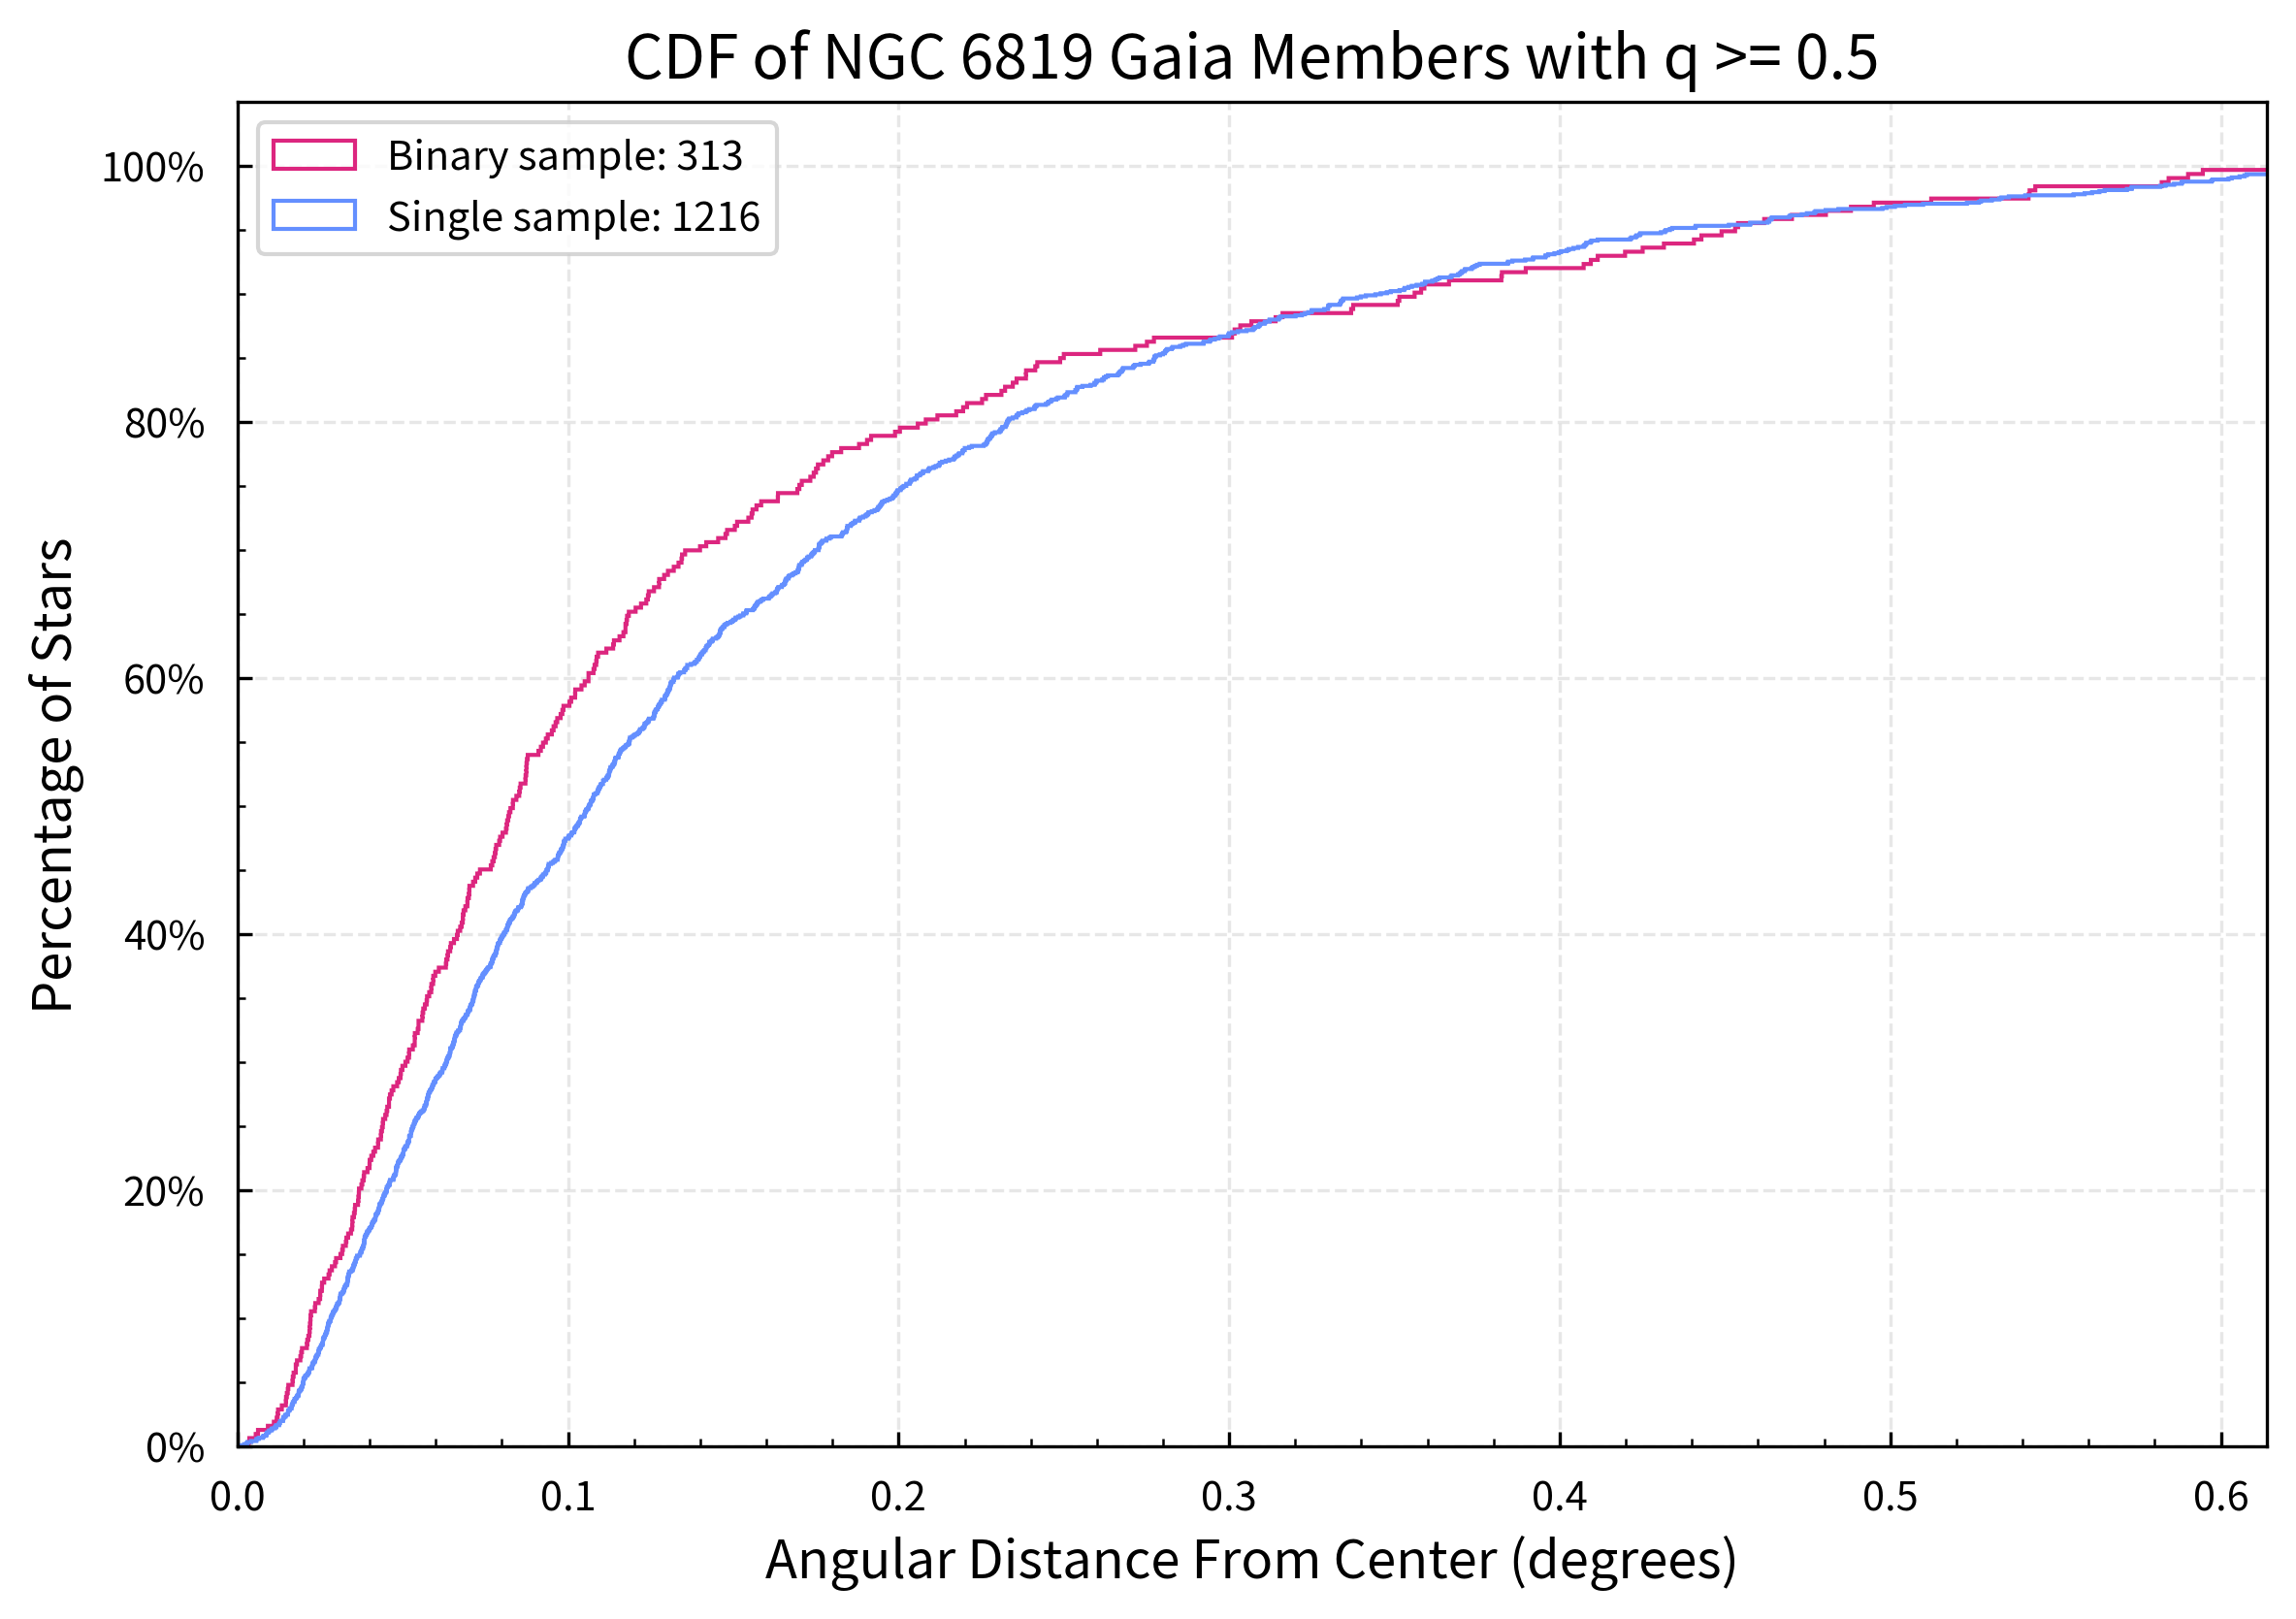

In [2790]:
#massratio CDF
# Select rows where qMean is greater than or equal to 0.5
qcutSingle = singlePhot_copy[singlePhot_copy['qMedian'] >= 0.00000000001]
qcutBinary = binaryPhot_copy[binaryPhot_copy['qMedian'] >= 0.5]

f,ax = plt.subplots(figsize=(9,6), facecolor='w', dpi=300)

single = qcutSingle['distance']
binary = qcutBinary['distance']

singleSample = single.shape[0]
binarySample = binary.shape[0]

binaryhist = ax.hist(binary, cumulative = True, density = True, histtype = "step", bins = 15000,color='#dc267f', label= f'Binary sample: {binarySample}')
singlehist = ax.hist(single, cumulative = True, density = True, histtype = "step", bins = 15000, color='#648fff', label=f'Single sample: {singleSample}')


ks_result, twoside_pvalue = ks_2samp(single,binary)
ks_result, less_pvalue = ks_2samp(single,binary,alternative='less')
print(twoside_pvalue)

plt.xlabel("Angular Distance From Center (degrees)", fontsize=13)
plt.ylabel("Percentage of Stars", fontsize=13)
plt.title("CDF of NGC 6819 Gaia Members with q >= 0.5", fontsize=15)
plt.grid(linestyle='--', alpha=0.3)
plt.legend(loc='upper left')
# plt.text(.008, .88, f'K-S "two-sided" P-value: {twoside_pvalue:.5f}\nK-S "less" P-value: {less_pvalue:.5f}\nBinary sample: {binarySample}\nSingle sample: {singleSample}',fontsize = 10, 
#          bbox = dict(facecolor='w', boxstyle='round', edgecolor='lightgray'))
# custom_lines = [Line2D([0], [0], color='g',alpha=1, lw=2, ls='-'),
#                                 Line2D([0], [0], color='b',alpha=1, lw=2, ls='-'),]

# twoside= ax.plot(1, 1, alpha= 0, label=f'K-S "two-sided" P-value: {twoside_pvalue:.5f}', color=None, linestyle=None)
# less= ax.plot(1, 1, alpha= 0, label=f'K-S "two-sided" P-value: {less_pvalue:.5f}', color=None, linestyle=None)
#ax.legend(loc=2, fontsize=8)
#leg = ax.legend(handlelength=0, handletextpad=0, fancybox=True, loc=2, fontsize=9)
#plt.legend(custom_lines, ['Binary stars', 'Single stars'],loc=2, fontsize=10)

# plt.annotate(text="Binary stars", color='g', xy=(.09,.81), xytext=(.09,.81), size=12)
# plt.annotate(text="Single stars", color='b', xy=(.155,.69), xytext=(.155,.69), size=12)
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.tick_params(which='both', direction="in")
ax.tick_params(axis='both', pad=8)
ax.set_xlim(0,.614)
plt.show()

In [2791]:
# Nbins= np.linspace(1, 1.4, 6)
# print(Nbins)

In [2792]:
# f,ax = plt.subplots(figsize=(9,6), facecolor='w', dpi=300)
# counts1, bins1, bars1 = plt.hist(binaryGaiaData['m1Mean'],Nbins, linewidth=2,color='purple',rwidth=0.97)
# plt.ylabel('N',fontsize=13)
# plt.xlabel('Primary masses (m1)',fontsize=13)
# plt.title('PDF of NGC 6819 Binary Star Primary Masses', fontsize=15)
# plt.show()
# print(counts1, bins1)

In [2793]:
# f,ax = plt.subplots(figsize=(9,6), facecolor='w', dpi=300)
# counts2, bins2, bars2 = plt.hist(singleGaiaData['m1Mean'],Nbins, linewidth=2,color='purple',rwidth=0.97)
# plt.ylabel('N',fontsize=13)
# plt.xlabel('Primary mass(M1)',fontsize=13)
# plt.title('PDF of NGC 6819 Single Star Primary Masses', fontsize=15)
# plt.show()

In [2794]:
# errors_y3 = np.sqrt(counts1)/counts2
# print(errors_y3)

In [2795]:
# print(bins1)
# #find halfway point between first and second bin
# print(bins1 + (bins1[1]-bins1[0])/2 )
# print(bins1[1]-bins1[0],bins1[2]-bins1[1])

# print(len(bins1), len(counts1/counts2))

In [2796]:
# print(bins1[:-1] + (bins1[1]-bins1[0])/2)

In [2797]:
# f,ax = plt.subplots(figsize=(9,6), facecolor='w', dpi=300)
# print(bins1,bins2)
# primarybins = bins1[:-1] + (bins1[1]-bins1[0])/2

# plt.errorbar(primarybins, counts1/(counts1 +counts2), xerr=None, yerr=errors_y3, fmt='o',capsize=5, color='black', ecolor='red')
# plt.ylabel('Binary fraction',fontsize=13)
# plt.xlabel('Primary mass',fontsize=13)
# plt.title('NGC 6819 Binary Fraction as a function of Primary Mass', fontsize=15)
# plt.show()

In [2798]:
# counts2

In [2799]:
# twod_histbins = np.linspace(0.5,1,6)
# print(twod_histbins)

In [2800]:
# f,ax = plt.subplots(figsize=(9,6), facecolor='w', dpi=300)
# plt.hist2d(binaryGaiaData['qMean'], binaryGaiaData['m1Mean'], bins=[twod_histbins,5], cmap='Purples', vmax=30)
# cb = plt.colorbar(label='counts per bin', extend='max')
# plt.xlabel('Mass Ratio',fontsize=13)
# plt.ylabel('Primary Mass',fontsize=13)
# plt.title("Primary Mass and Mass Ratio distribution", fontsize=15)
# plt.show()

In [2801]:
# #qmean and distance
# f,ax = plt.subplots(figsize=(9,6), facecolor='w', dpi=300)
# plt.hist2d(binaryGaiaData['qMean'], binaryGaiaData['distance'], bins=[twod_histbins, 5], cmap='Purples', vmax=25)
# cb = plt.colorbar(label='counts in bin', extend='max')
# plt.xlabel('Mass Ratio',fontsize=13)
# plt.ylabel('Distance from cluster center',fontsize=13)
# plt.title("Distance from cluster center and Mass Ratio distribution", fontsize=15)
# plt.show()

In [2802]:
# f,ax = plt.subplots(figsize=(9,6), facecolor='w', dpi=300)
# counts, bins, bars =plt.hist(binaryGaiaData['distance'], bins=5,linewidth=2,color='purple',rwidth=0.97)
# plt.xlabel('Distance from Cluster Center',fontsize=13)
# plt.ylabel('N',fontsize=13)
# plt.title("PDF of NGC 6819 Binary Star Cluster Center Distance", fontsize=15)
# plt.show()

In [2803]:
# f,ax = plt.subplots(figsize=(9,6), facecolor='w', dpi=300)
# counts2, bins2, bars2 = plt.hist(singleGaiaData['distance'], bins=5, range=[0,1],linewidth=2,color='purple',rwidth=0.97)
# plt.xlabel('Distance from Cluster Center',fontsize=13)
# plt.ylabel('N',fontsize=13)
# plt.title('PDF of NGC 6819 Single Star Cluster Center Distance')
# plt.show()

In [2804]:
# bins

In [2805]:
# # is this the right way to do error? can we factor in the std of the values themselves?
# errors_y = np.sqrt(counts)/counts2


In [2806]:
# bins3 = [ 0.20038481, 0.39769111, 0.5949974 , 0.79230369,
#        0.98960999 ]

# plt.xlabel('distance from cluster center',fontsize=15)
# plt.ylabel('binary fraction',fontsize=15)
# plt.scatter(bins3, counts/counts2, color='blue')

In [2807]:
# plt.xlabel('distance from cluster center',fontsize=15)
# plt.ylabel('binary fraction',fontsize=15)
# plt.errorbar(bins3, counts/counts2, xerr=None, yerr=errors_y, fmt='o',capsize=5, color='black', ecolor='red')

In [2808]:
print(np.min(binaryPhot_copy['distance']), np.max(binaryPhot_copy['distance']))

0.0033659112006952517 0.6174737642525738


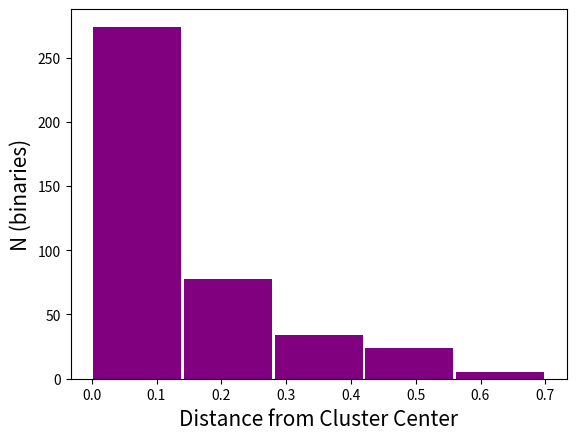

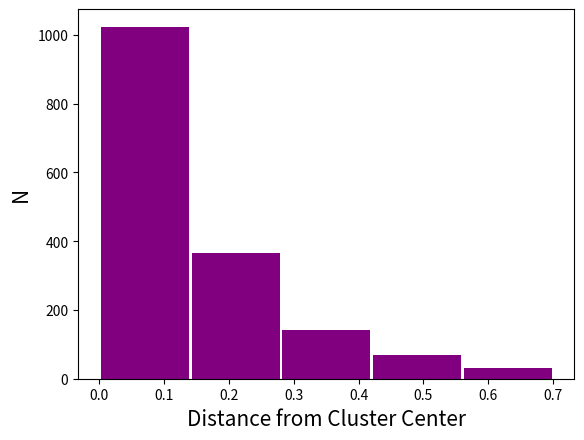

In [2809]:
#NEW CODE
Nbins= np.linspace(0, .7, 6)
counts, bins3, bars =plt.hist(binaryPhot_copy['distance'], Nbins,linewidth=2,color='purple',rwidth=0.97)
plt.xlabel('Distance from Cluster Center',fontsize=15)
plt.ylabel('N (binaries)',fontsize=15)
plt.show()

counts2, bins4, bars2 = plt.hist(photMems_copy['distance'], Nbins, range=[0,1],linewidth=2,color='purple',rwidth=0.97)
plt.xlabel('Distance from Cluster Center',fontsize=15)
plt.ylabel('N',fontsize=15)
plt.show()

[0.   0.14 0.28 0.42 0.56 0.7 ] [0.   0.14 0.28 0.42 0.56 0.7 ]


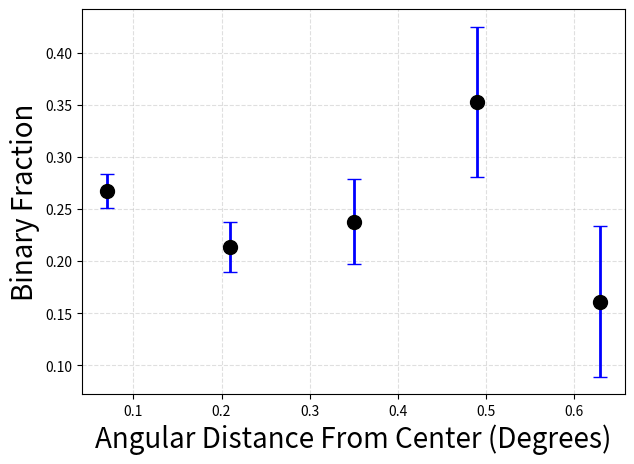

In [2810]:
errors_y = np.sqrt(counts)/counts2


print(bins3,bins4)
primarybins2 = bins3[:-1] + (bins3[1]-bins4[0])/2

fig = plt.figure(figsize=(7,5), facecolor='w') # try exp bins
plt.xlabel('Angular Distance From Center (Degrees)',fontsize=20)
plt.ylabel('Binary Fraction',fontsize=20)
plt.errorbar(primarybins2, counts/counts2, xerr=None, yerr=errors_y, fmt='o',capsize=5, color='black', ecolor='b',markersize=10,linewidth=2)
plt.grid(linestyle='--', alpha=0.4)
plt.savefig('M35plot1.pdf',dpi=300, bbox_inches="tight")

## plots of Only the center of CMD  13-17

In [2811]:
# counts5, bins5, bars5 = plt.hist(cutBinaryGaiaData['m1Mean'],bins=np.linspace(1,1.4, 8), linewidth=2,color='purple',rwidth=0.97)
# plt.ylabel('N(binaries) cut',fontsize=15)
# plt.xlabel('Primary mass(M1) cut',fontsize=15)

In [2812]:
# bins5

In [2813]:
# counts6, bins6, bars6 = plt.hist(cutSingleGaiaData['m1Mean'],bins=np.linspace(1,1.4, 8),linewidth=2,color='purple',rwidth=0.97)
# plt.ylabel('N cut',fontsize=15)
# plt.xlabel('Primary mass(M1) cut',fontsize=15)

In [2814]:
# bins6

In [2815]:
# # the arrays arent the same size. should i be getting rid of the first bin value or last?
# primarybins2 = bins5[:-1] + (bins5[1]-bins5[0])/2
# errors_y4 = np.sqrt(counts5)/counts6
# plt.errorbar(primarybins2, counts5/counts6, xerr=None, yerr=errors_y4, fmt='o',capsize=5, color='black', ecolor='red')
# plt.ylabel('binary fraction cut',fontsize=15)
# plt.xlabel('primary mass cut',fontsize=15)

In [2816]:
# plt.hist2d(cutBinaryGaiaData['qMean'], cutBinaryGaiaData['m1Mean'], bins=4, cmap='Blues')
# cb = plt.colorbar(label='counts in bin')
# plt.xlabel('Mass Ratio cut',fontsize=15)
# plt.ylabel('primary mass cut',fontsize=15)

In [2817]:
# #qmean and distance
# f,ax = plt.subplots(figsize=(9,6), facecolor='w', dpi=300)
# plt.hist2d(cutBinaryGaiaData['qMean'], cutBinaryGaiaData['distance'], bins=5, cmap='Purples', vmax=25)
# cb2 = plt.colorbar(extend="max",label='counts per bin')
# plt.xlabel('Mass Ratio (cut)',fontsize=13)
# plt.ylabel('Distance from cluster center (cut)',fontsize=13)
# plt.title("Distance from cluster center and Mass Ratio distribution", fontsize=15)
# plt.show()

In [2818]:
# counts7, bins7, bars7 =plt.hist(cutBinaryGaiaData['distance'], bins=5,linewidth=2,color='purple',rwidth=0.97)
# plt.xlabel('Distance from Cluster Center cut',fontsize=15)
# plt.ylabel('N (binaries) cut',fontsize=15)

In [2819]:
# counts8, bins8, bars8 = plt.hist(cutSingleGaiaData['distance'], bins=5, range=[0,1],linewidth=2,color='purple',rwidth=0.97)
# plt.xlabel('Distance from Cluster Center cut',fontsize=15)
# plt.ylabel('N cut',fontsize=15)

In [2820]:
# bins7 = [0.2,0.4,0.6,0.8,1]
# bins8 = [0,0.2,0.4,0.6,0.8,1]
# bins7 

In [2821]:
# # is this the right way to do error? can we factor in the std of the values themselves?
# errors_y2 = np.sqrt(counts7)/counts8


In [2822]:
# plt.xlabel('distance from cluster center cut',fontsize=15)
# plt.ylabel('binary fraction cut',fontsize=15)
# print(len(bins8), len(errors_y2))
# plt.errorbar(bins8, counts7/counts8, xerr=None, yerr=errors_y2, fmt='o',capsize=5, color='black', ecolor='red')


In [2823]:
# cutBinaryGaiaData.columns

In [2824]:
# f, ax = plt.subplots(figsize=(5,8))
# ax.plot(cutBinaryGaiaData['G_BP'] - cutBinaryGaiaData['G_RP_x'], cutBinaryGaiaData['G'],'.', color='gray')
# ax.set_xlim(0, 3)
# ax.set_ylim(23, 12)

(23.0, 12.0)

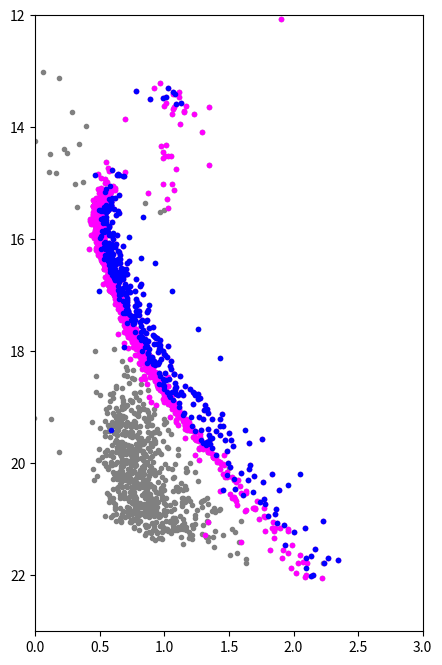

In [2825]:
f, ax = plt.subplots(figsize=(5,8))
photMems = phot.loc[phot['member']]
photBinary = phot.loc[phot['binary']]
ax.plot(phot['g_ps'] - phot['i_ps'], phot['g_ps'],'.', color='gray')
ax.plot(photMems['g_ps'] - photMems['i_ps'], photMems['g_ps'],'.', color='magenta')
ax.plot(photBinary['g_ps'] - photBinary['i_ps'], photBinary['g_ps'],'.', color='blue')
ax.set_xlim(0, 3)
ax.set_ylim(23, 12)

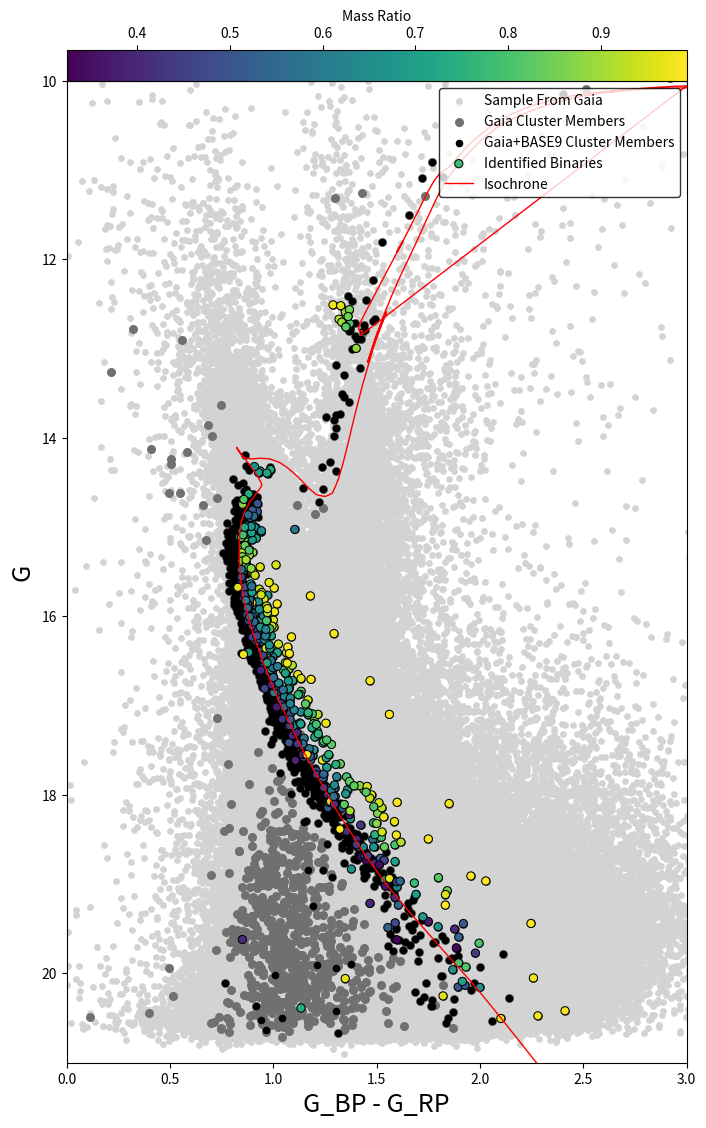

In [2826]:
r = photBinary['qMedian']
f, ax = plt.subplots(figsize=(8,15))

ax.set_xlabel('G_BP - G_RP',fontsize=18)
ax.set_ylabel('G',fontsize=18)
#plot phot and cluster members
plt.scatter(originalGaia['G_BP'] - originalGaia['G_RP'], originalGaia['G'],s=15, color='lightgray',label='Sample From Gaia')
plt.scatter(phot['G_BP'] - phot['G_RP'], phot['G'],s=30, color='#707070',label='Gaia Cluster Members')
plt.scatter(photMems['G_BP'] - photMems['G_RP'], photMems['G'],s=20, color='#000000',label='Gaia+BASE9 Cluster Members')
#plt.scatter(photBinary['g_ps'] - photBinary['i_ps'], photBinary['g_ps'], color='#000000')
ax.set_xlim(0, 3)
ax.set_ylim(21,10)


#plot colorbar
plt.scatter(photBinary['G_BP'] - photBinary['G_RP'], photBinary['G'], s=35, c=r, cmap=plt.cm.get_cmap("viridis"),edgecolors= "black",linewidth=0.75,label='Identified Binaries')

plt.colorbar(label="Mass Ratio", orientation="horizontal",pad=0,location='top')


#overplot isochrone
photfile = ph
cmdfile = r"/Users/Claire/Documents/Code/current/ANNACRNN/NGC6819_FINAL/NGC_6819_final.ms"
mag       = 'G'
color     = 'G_BP-G_RP'.split('-')
header   = np.loadtxt(cmdfile,max_rows=1,dtype=str)
yplot     = np.where(header == mag)[0][0]
color1    = np.where(header == color[0])[0][0]
color2    = np.where(header == color[1])[0][0]
data = np.loadtxt(cmdfile,skiprows=1)
ymag    = data[:,yplot]
color   = data[:,color1] - data[:,color2]
plt.plot(color, ymag, color='red',linewidth=1,label='Isochrone')
plt.legend(loc="upper right",edgecolor='black')
#plt.show()
plt.savefig('MegaCMD1.png',dpi=300, bbox_inches="tight")
    


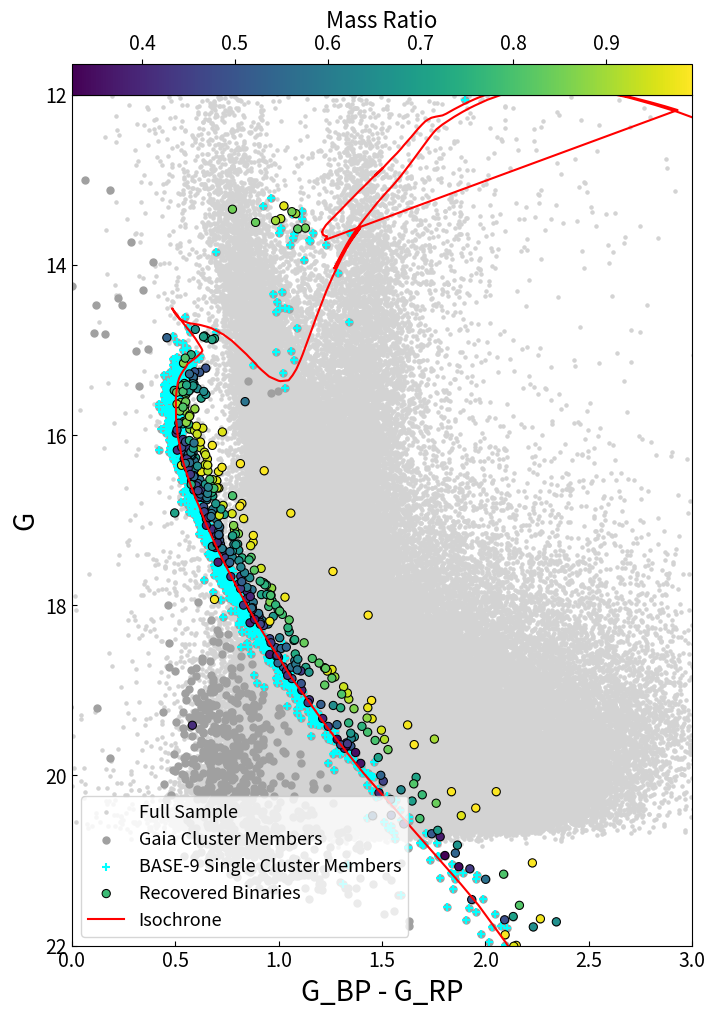

In [2827]:
r = photBinary['qMedian']
f, ax = plt.subplots(figsize=(8,13), facecolor='w')
ax.set_xlabel('G_BP - G_RP',fontsize=20)
ax.set_ylabel('G',fontsize=20)
#plot phot and cluster members
plt.scatter(originalGaia['G_BP'] - originalGaia["G_RP"], originalGaia["G"], s=5, color="#D3D3D3", label="Full Sample")
plt.scatter(phot['g_ps'] - phot['i_ps'], phot['g_ps'],s=25, color='#A0A0A0', label="Gaia Cluster Members")
plt.scatter(photMems['g_ps'] - photMems['i_ps'], photMems['g_ps'],s=35, color='cyan', marker="+", label="BASE-9 Single Cluster Members")
#plt.scatter(photBinary['g_ps'] - photBinary['i_ps'], photBinary['g_ps'], color='#000000')


ax.set_xlim(0, 3)
ax.set_ylim(22, 12)
#plot colorbar
plt.scatter(photBinary['g_ps'] - photBinary['i_ps'], photBinary['g_ps'], s=35, c=r, cmap=plt.cm.get_cmap("viridis"),edgecolors= "black",linewidth=0.75, label="Recovered Binaries")
cbar = plt.colorbar(orientation="horizontal",pad=0,location='top')
cbar.set_label("Mass Ratio", fontsize=16)
tick_font_size = 14
cbar.ax.tick_params(labelsize=tick_font_size)

cmdfile =r"/Users/Claire/Documents/Code/current/ANNACRNN/NGC6819_FINAL/NGC_6819_final.ms"
mag     = "g_ps"
color     = "g_ps-i_ps".split('-')

header = np.loadtxt(cmdfile,max_rows=1,dtype=str)
yplot     = np.where(header == mag)[0][0]
color1    = np.where(header == color[0])[0][0]
color2    = np.where(header == color[1])[0][0]
data = np.loadtxt(cmdfile,skiprows=1)
ymag    = data[:,yplot]
color   = data[:,color1] - data[:,color2]
plt.plot(color, ymag, color='red', label="Isochrone")
ax.legend(fontsize=13,loc="lower left")
ax.tick_params(which = 'major', direction = 'in', labelsize = 14)
plt.savefig('cmdWithMassRatio.png', dpi=300)

plt.show()

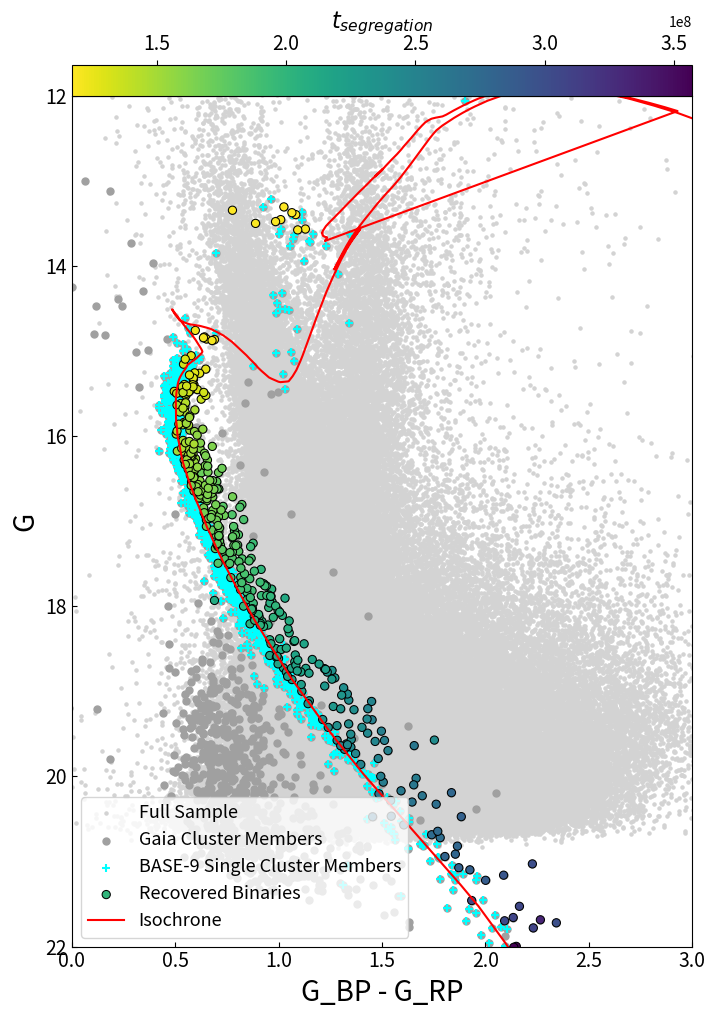

In [2828]:
r = binaryPhot_copy['t_seg']
f, ax = plt.subplots(figsize=(8,13), facecolor='w')
ax.set_xlabel('G_BP - G_RP',fontsize=20)
ax.set_ylabel('G',fontsize=20)
#plot phot and cluster members
plt.scatter(originalGaia['G_BP'] - originalGaia["G_RP"], originalGaia["G"], s=5, color="#D3D3D3", label="Full Sample")
plt.scatter(phot['g_ps'] - phot['i_ps'], phot['g_ps'],s=25, color='#A0A0A0', label="Gaia Cluster Members")
plt.scatter(photMems_copy['g_ps'] - photMems_copy['i_ps'], photMems_copy['g_ps'],s=35, color='cyan', marker="+", label="BASE-9 Single Cluster Members")
#plt.scatter(photBinary['g_ps'] - photBinary['i_ps'], photBinary['g_ps'], color='#000000')

ax.set_xlim(0, 3)
ax.set_ylim(22, 12)
#plot colorbar
plt.scatter(binaryPhot_copy['g_ps'] - binaryPhot_copy['i_ps'], binaryPhot_copy['g_ps'], s=35, c=r, cmap=plt.cm.get_cmap("viridis").reversed(),edgecolors= "black",linewidth=0.75, label="Recovered Binaries")
cbar = plt.colorbar(orientation="horizontal",pad=0,location='top')
cbar.set_label("$t_{segregation}$", fontsize=16)
tick_font_size = 14
cbar.ax.tick_params(labelsize=tick_font_size)

cmdfile =r"/Users/Claire/Documents/Code/current/ANNACRNN/NGC6819_FINAL/NGC_6819_final.ms"
mag     = "g_ps"
color     = "g_ps-i_ps".split('-')

header = np.loadtxt(cmdfile,max_rows=1,dtype=str)
yplot     = np.where(header == mag)[0][0]
color1    = np.where(header == color[0])[0][0]
color2    = np.where(header == color[1])[0][0]
data = np.loadtxt(cmdfile,skiprows=1)
ymag    = data[:,yplot]
color   = data[:,color1] - data[:,color2]
plt.plot(color, ymag, color='red', label="Isochrone")
ax.legend(fontsize=13,loc="lower left")
ax.tick_params(which = 'major', direction = 'in', labelsize = 14)
plt.savefig('cmdWithtSegregation.png', dpi=300)

plt.show()

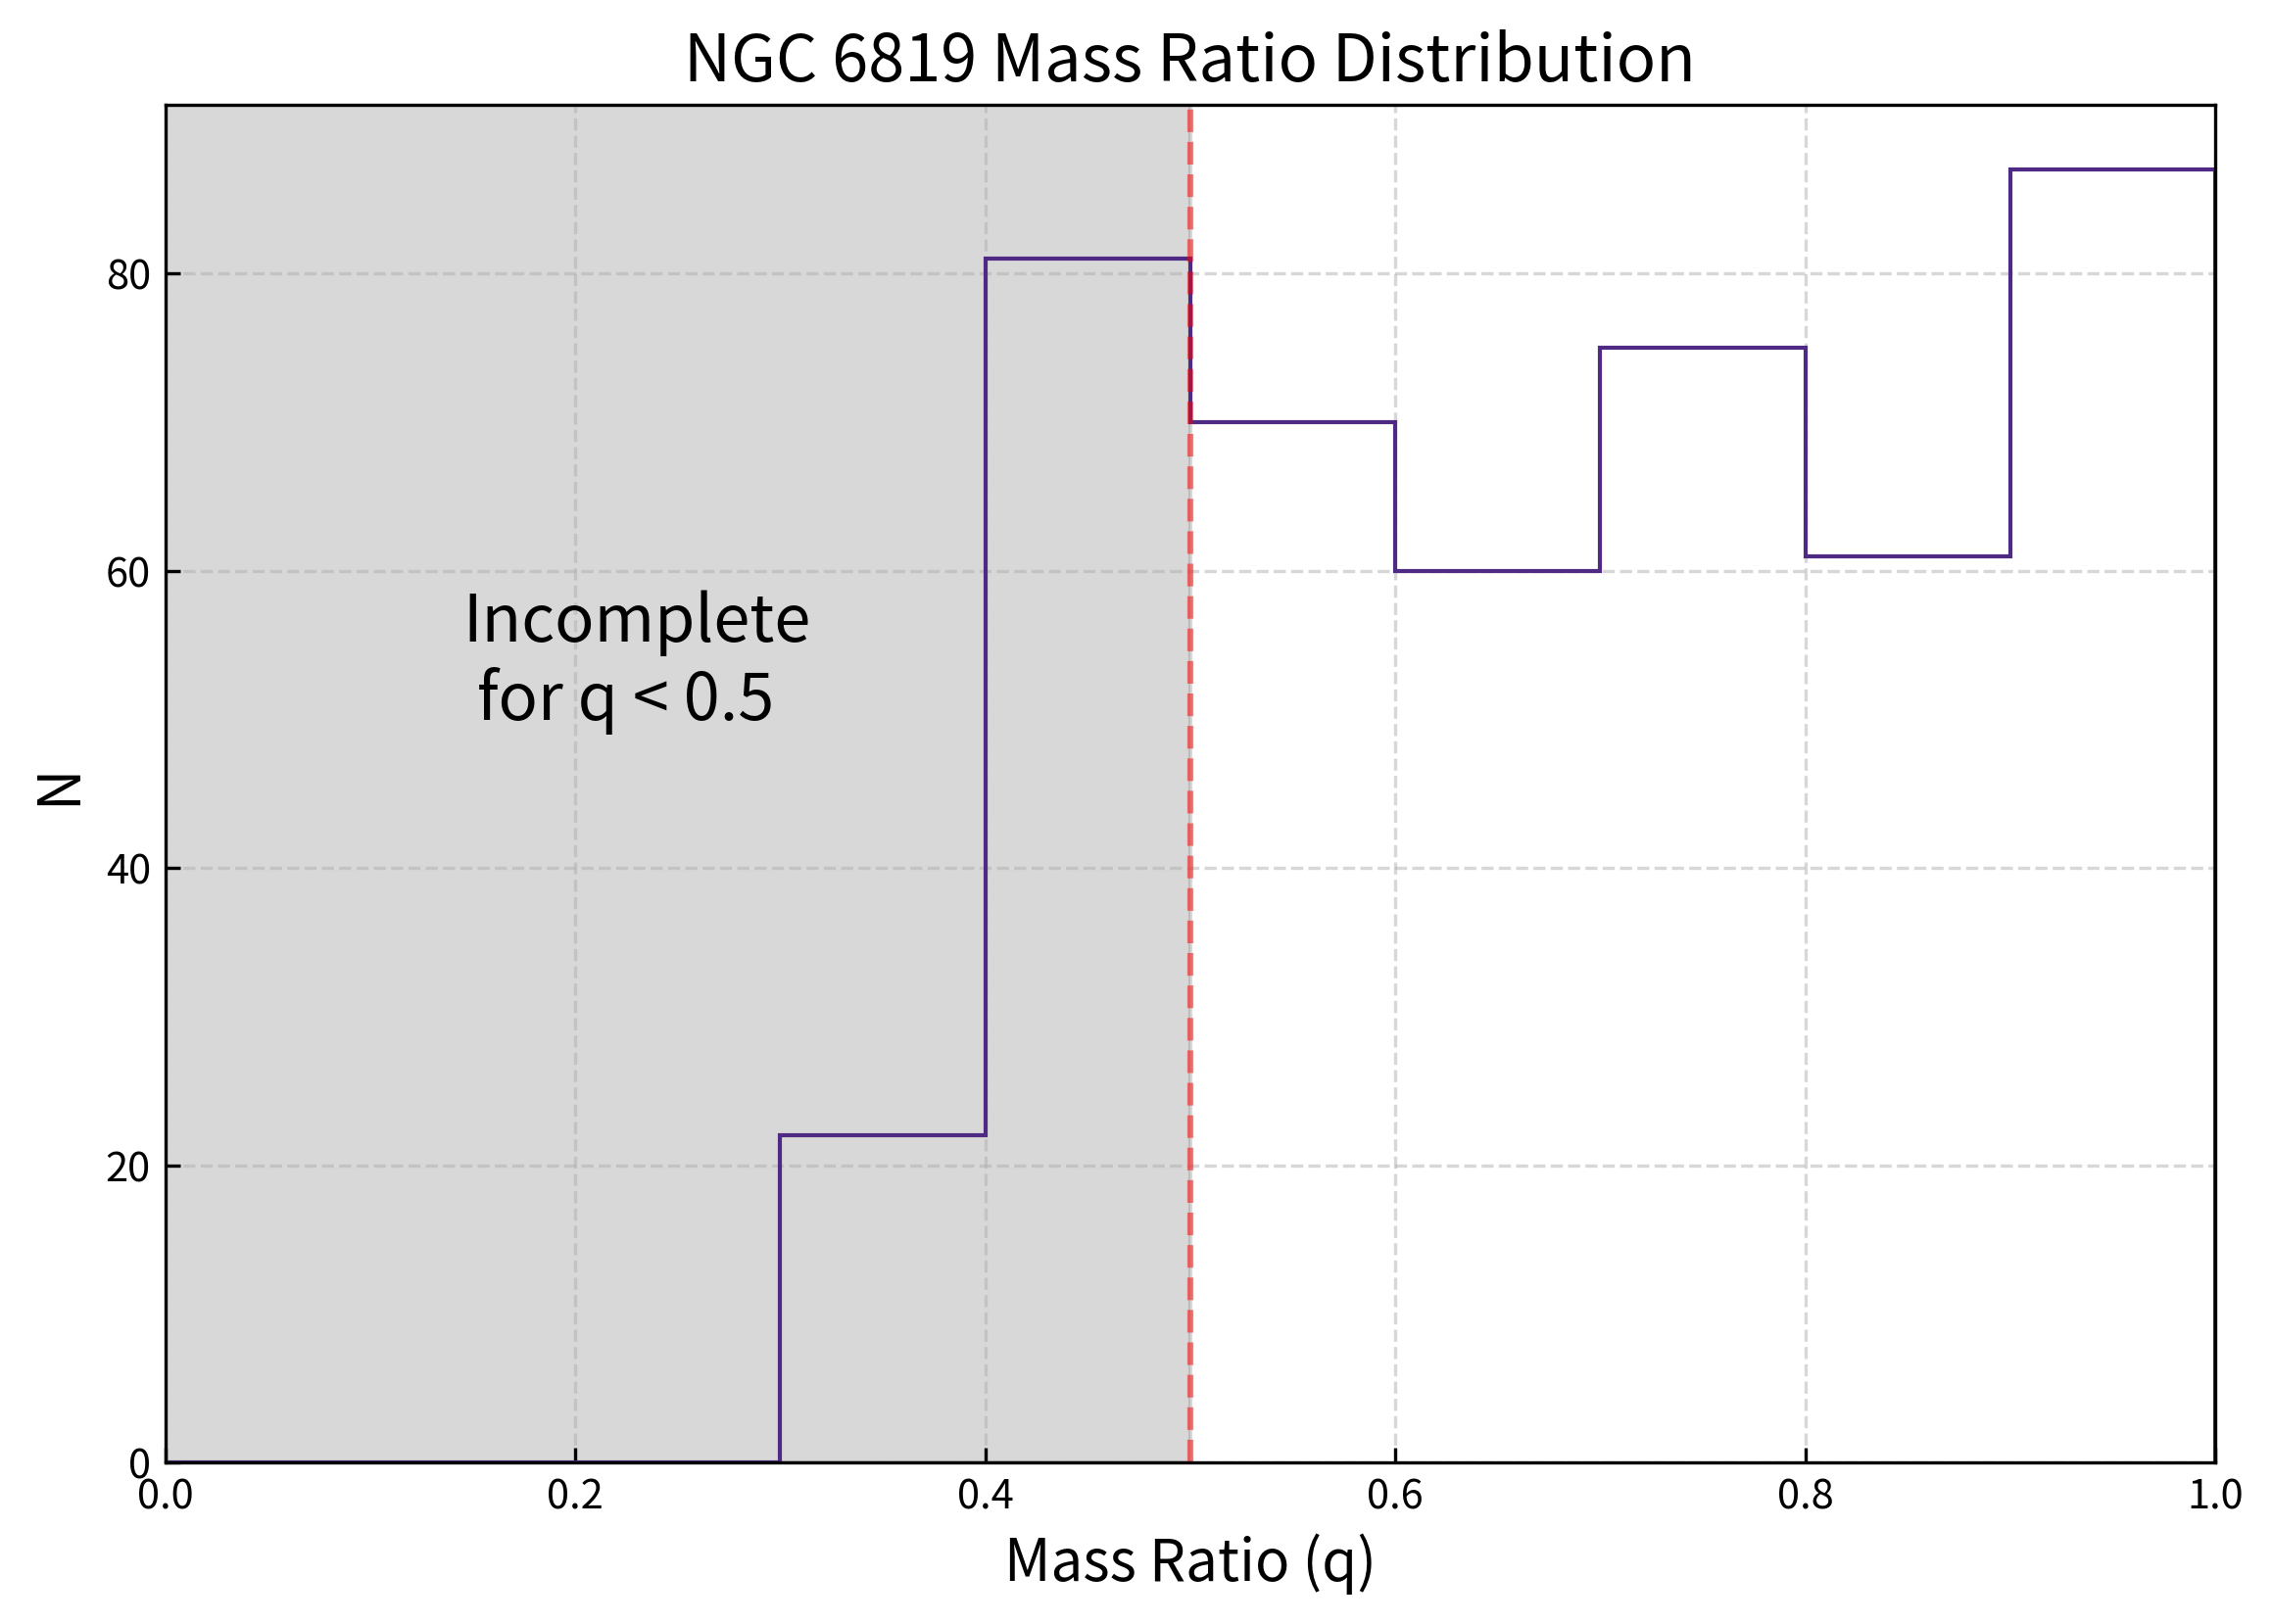

In [2829]:
f, ax = plt.subplots(figsize=(9,6), facecolor='w', dpi=300)
photBinary = phot.loc[phot['binary']]
_ = ax.hist(photBinary['qMedian'], histtype='step', color="#4e2a84" ,bins=10, range=[0,1])
ax.set_xlabel("Mass Ratio (q)", fontsize=14)
ax.set_ylabel("N", fontsize=14)
ax.annotate(text='Incomplete\n for q < 0.5', xy=(.145,50), xytext=(.145,50), fontsize=16)
ax.axvline(x=0.5, color='red', linestyle='--', alpha=0.5)
ax.axvspan(0,0.5, color='gray', alpha=0.3)
ax.set_title("NGC 6819 Mass Ratio Distribution", fontsize=16)
plt.grid(linestyle='--', alpha=0.5)
ax.tick_params(which='both', direction="in")
ax.set_xlim(0,1)
plt.savefig("massratio.png", dpi=300)

In [2830]:
# f, ax = plt.subplots()
# photBinary = phot.loc[phot['binary']]
# _ = ax.hist(photBinary['qMean'], bins=10, range=[0,1],linewidth=2,color='#900C3F',rwidth=0.97)
# ax.set_xlabel('Mass Ratio (q)',fontsize=15)
# ax.set_ylabel('N',fontsize=15)
# #plt.savefig('M67qhist1.png',dpi=300, bbox_inches="tight")

In [2831]:
# f, ax = plt.subplots(figsize=(6,10))

# ax.set_xlabel('G_BP - G_RP',fontsize=20)
# ax.set_ylabel('G',fontsize=20)
# #plot phot and cluster members
# plt.scatter(M67.data['phot_bp_mean_mag'] - M67.data['phot_rp_mean_mag'], M67.data['phot_g_mean_mag'],s=15, color='lightgray',label='Sample From Gaia')
# plt.scatter(phot['G_BP'] - phot['G_RP'], phot['G'],s=30, color='Deeppink',label='Gaia Cluster Members', edgecolors= "black",linewidth=0.2)
# ax.set_xlim(0, 3)
# ax.set_ylim(21,10)
# #plt.savefig('M67cmd.png', bbox='tight',dpi=300)